In [12]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.serif"] = ["cmr10"]
plt.rcParams["font.size"] = 21


# "Invalid" version
RESULTS_PATH = f"{os.curdir}/results/load-based-v2/twitter/majority_poor/load9_results.csv"

# Inshallah good
RESULTS_PATH = f"{os.curdir}/results/load-based-v2/twitter/2025-06-03-13H/load9_results.csv"



In [13]:
# Define new color mapping for all tests (adjust as needed)
colors = {

    "load": {
    "no_materialization":  "#2ca02c",  # Blue
    "load_based_m1":  "#2ca02c",  # Blue
    "load_based_m2":  "#2ca02c",  # Blue 
    "load_based_m3":  "#2ca02c",  # Blue
    "load_based_m4":  "#2ca02c",  # Blue

    "load_based_m5":  "#2ca02c",  # Blue
    "load_based_m6":  "#2ca02c",  # Blue
    "load_based_m7":  "#2ca02c",  # Blue
    "load_based_m8":  "#2ca02c",  # Blue
    "load_based_m9":  "#2ca02c",  # Blue

    "load_based_m10": "#2ca02c",  # Blue
    "load_based_m11": "#2ca02c",  # Blue
    "load_based_m12": "#2ca02c",  # Blue
    "load_based_m13": "#2ca02c",  # Blue
    "load_based_m14": "#2ca02c",  # Blue
    },

    "schema": {
    "no_materialization":  "#d62728",  # Blue
    "schema_based_s1":  "#d62728",  # Blue
    "schema_based_s2":  "#d62728",  # Blue
    "schema_based_s3":  "#d62728",  # Blue
    "schema_based_s4":  "#d62728",  # Blue

    "schema_based_s5":  "#d62728",  # Blue
    "schema_based_s6":  "#d62728",  # Blue
    "schema_based_s7":  "#d62728",  # Blue
    "schema_based_s8":  "#d62728",  # Blue
    "schema_based_s9":  "#d62728",  # Blue

    "schema_based_s10": "#d62728",  # Blue
    "schema_based_s11": "#d62728",  # Blue
    "schema_based_s12": "#d62728",  # Blue
    "schema_based_s13": "#d62728",  # Blue
    "schema_based_s14": "#d62728",  # Blue

    },

    "frequency": {
    "no_materialization":  "#1f77b4",  # Blue
    "frequency_based_f1":  "#1f77b4",  # Blue
    "frequency_based_f2":  "#1f77b4",  # Blue
    "frequency_based_f3":  "#1f77b4",  # Blue
    "frequency_based_f4":  "#1f77b4",  # Blue

    "frequency_based_f5":  "#1f77b4",  # Blue
    "frequency_based_f6":  "#1f77b4",  # Blue
    "frequency_based_f7":  "#1f77b4",  # Blue
    "frequency_based_f8":  "#1f77b4",  # Blue
    "frequency_based_f9":  "#1f77b4",  # Blue

    "frequency_based_f10": "#1f77b4",  # Blue
    "frequency_based_f11": "#1f77b4",  # Blue
    "frequency_based_f12": "#1f77b4",  # Blue
    "frequency_based_f13": "#1f77b4",  # Blue
    "frequency_based_f14": "#1f77b4",  # Blue
    },

}


test_order_frequency = list(colors["frequency"].keys())
test_order_schema = list(colors["schema"].keys())
test_order_load = list(colors["load"].keys())

def shorten_label_into_number(test):
    if test == "no_materialization":
        return 0
    elif test.startswith("load_based_") or test.startswith("schema_based_") or test.startswith("frequency_based_"):
        return int((test.split("_")[-1])[1:])
    else:
        return test
    

    # Helper function to shorten the labels
def shorten_label(test):
    if test.startswith("load_based_"):
        return test.split("_")[-1]
    elif test.startswith("schema_based_"):
        return test.split("_")[-1]
    elif test.startswith("frequency_based_"):
        return test.split("_")[-1]
    else:
        return test


In [14]:
def plot_load_results(df_load, load, strategy):
    """
    Create a bar plot showing total query time for different tests at a specific load.
    
    Args:
        df_load (pd.DataFrame): DataFrame containing results for a specific load
        load (int): Load value being plotted
    """
    # Create shortened labels for x-axis
    short_labels = [shorten_label(test) for test in df_load["Test"]]
    
    # Define positions and bar width    
    x = np.arange(len(df_load))
    bar_width = 0.6

    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot bars using raw "Total query time" values
    ax.bar(
        x,
        df_load["Total Query Time"],
        bar_width,
        color=[colors[strategy][test] for test in df_load["Test"]]
    )

    
    # Set x-axis labels and titles
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, rotation=45)
    ax.set_xlabel("Test")
    ax.set_ylabel("Total Query Time (s)")
    ax.set_title(f"Load {load}: Total Query Time")
    ax.grid(True, axis="y")
    plt.tight_layout()
    plt.show()


def plot_mean_results(mean_df, strategy):
    # Create shortened labels for x-axis
    short_labels = [shorten_label(test) for test in mean_df["Test"]]
    
    # Define positions and bar width
    x = np.arange(len(mean_df))
    bar_width = 0.6

    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot bars using raw "Total query time" values
    ax.bar(
        x,
        mean_df["mean"],
        bar_width,
        color=[colors[strategy][test] for test in mean_df["Test"]]
    )

    # Plot bars with error bars for standard error
    ax.bar(
        x,
        mean_df["mean"],
        bar_width,
        color=[colors[strategy][test] for test in mean_df["Test"]],
        yerr=mean_df["stderr"],
        capsize=5
    )
    
    # Set x-axis labels and titles
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, rotation=45)
    ax.set_xlabel("Test")
    ax.set_ylabel("Total Query Time (s)")
    ax.set_title(f"Mean: Total Query Time")
    ax.grid(True, axis="y")
    plt.tight_layout()
    plt.show()

In [15]:
def prepare_df_for_plot(df, strategy):

    if strategy == 'frequency':
        test_order = test_order_frequency
    elif strategy == 'schema':
        test_order = test_order_schema
    elif strategy == 'load':
        test_order = test_order_load


    # Filter the DataFrame for the current load and tests in test_order
    df = df[(df["Test"].isin(test_order))].copy()
        
    # Ensure tests are ordered as defined in test_order
    df["Test"] = pd.Categorical(df["Test"], categories=test_order, ordered=True)

        # Instead of sorting by mean, we sort by the numeric value from shorten_label_into_number
    df = df.sort_values(by="Test", key=lambda col: col.map(shorten_label_into_number))
    return df


def create_mean_df(df):
    df = df.groupby("Test")["Total Query Time"].agg(
        mean="mean", std="std", count="count", max="max", min="min"
    ).reset_index()
    df["stderr"] = df["std"] / np.sqrt(df["count"])
    return df




In [16]:
def load_results_df(path, strategy):
    results_df = pd.read_csv(f"{path}")

    # remove Unamed: 0 column
    if "Unnamed: 0" in results_df.columns:
        results_df = results_df.drop(columns=['Unnamed: 0'])

    results_frequency_df = results_df[(results_df["Test"].str.contains('frequency_based_f')) | (results_df["Test"].str.contains('no_materialization'))]
    results_schema_df = results_df[(results_df["Test"].str.contains('schema_based_s')) | (results_df["Test"].str.contains('no_materialization'))]
    results_load_df = results_df[(results_df["Test"].str.contains('load_based_m')) | (results_df["Test"].str.contains('no_materialization'))]
    
    if strategy == 'frequency':
        return results_frequency_df
    
    if strategy == 'schema':
        return results_schema_df
    
    if strategy == 'load':
        return results_load_df


# Frequency

/tmp/ipykernel_1187797/1225945818.py:48: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


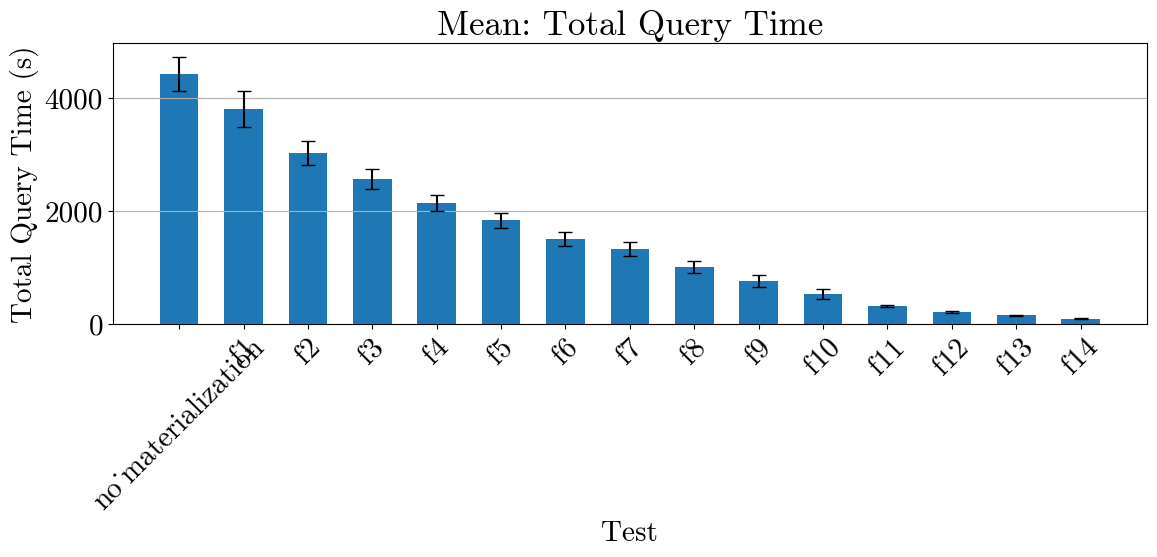

In [17]:
results_df = load_results_df(RESULTS_PATH, strategy = 'frequency')
results_mean_df = create_mean_df(results_df)
results_mean_df = prepare_df_for_plot(results_mean_df, strategy = 'frequency')
plot_mean_results(results_mean_df, strategy = 'frequency')

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


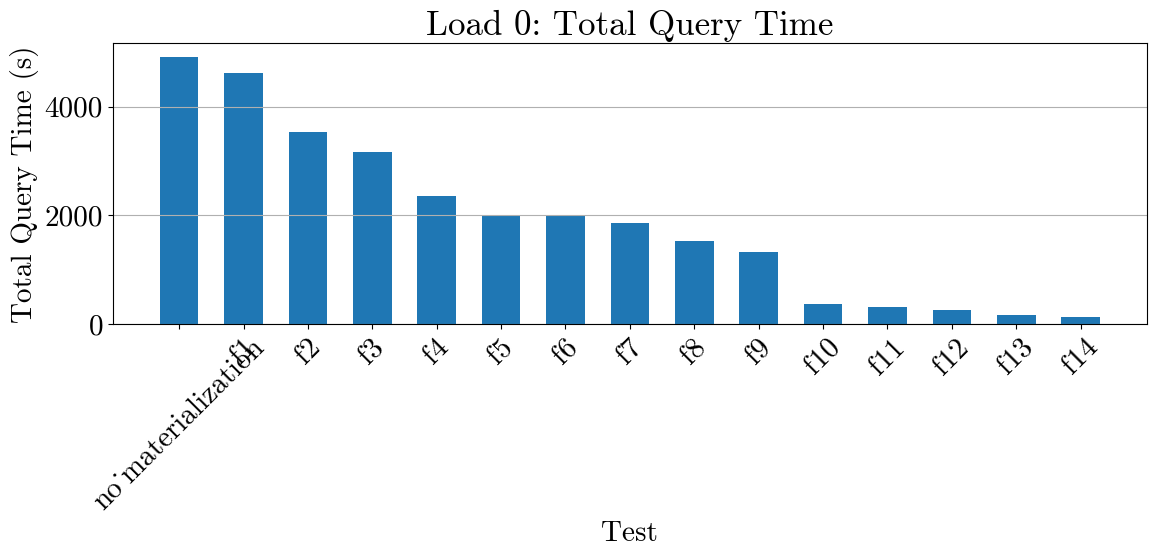

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


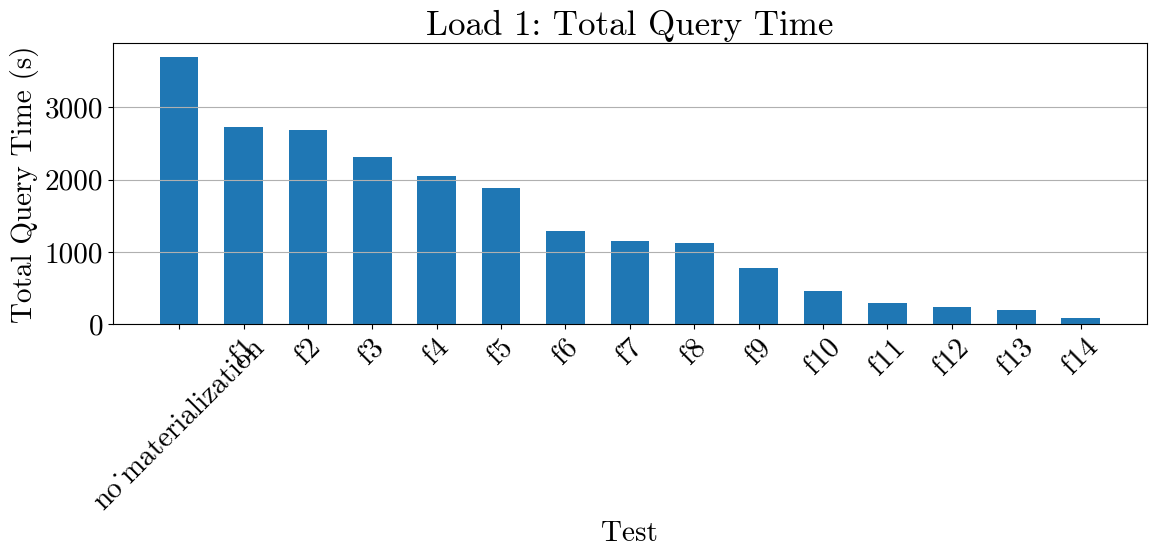

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


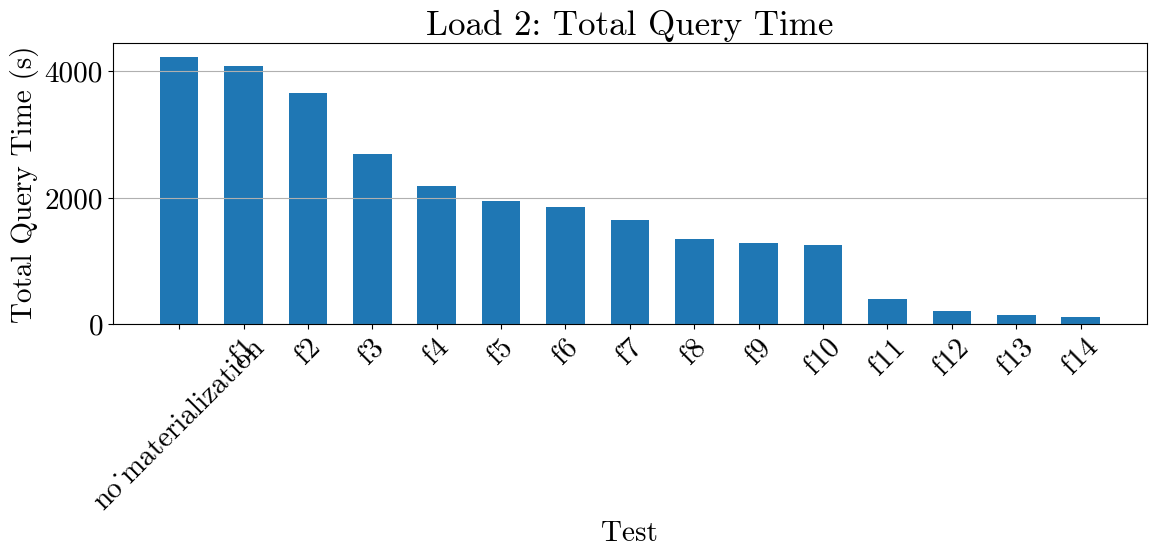

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


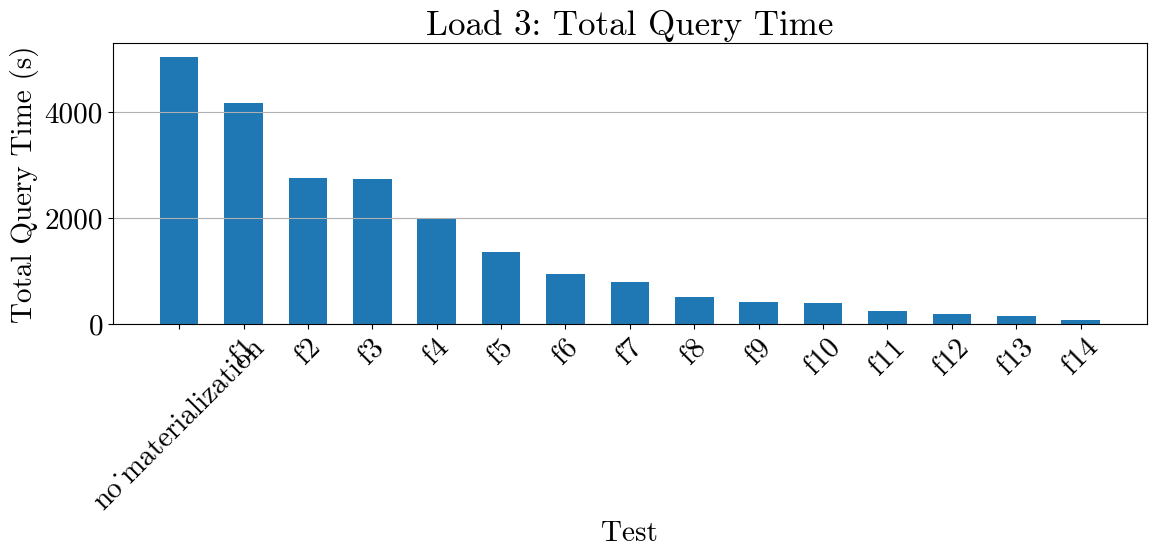

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


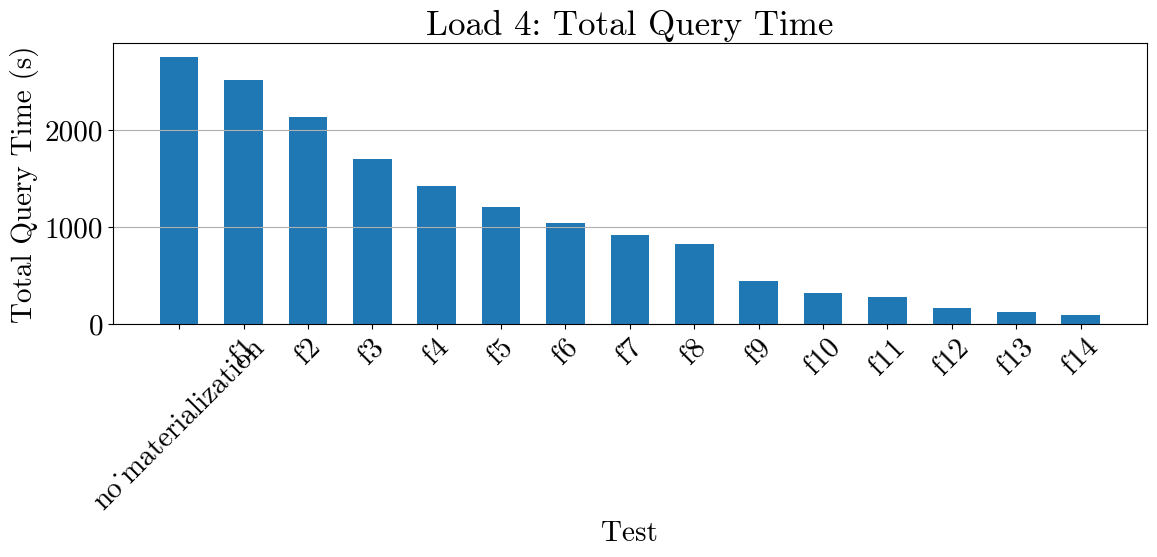

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


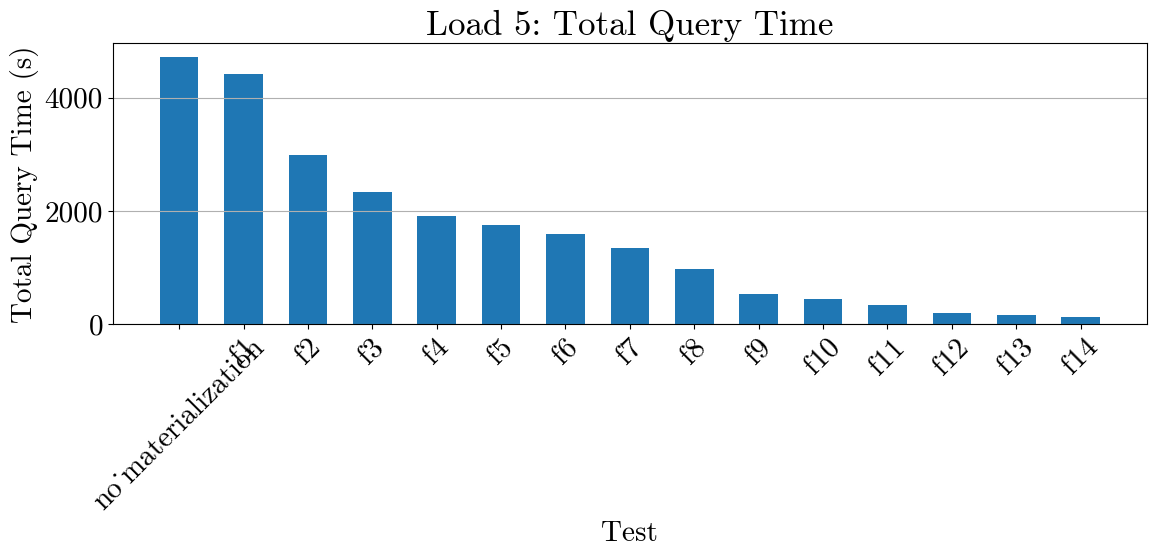

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


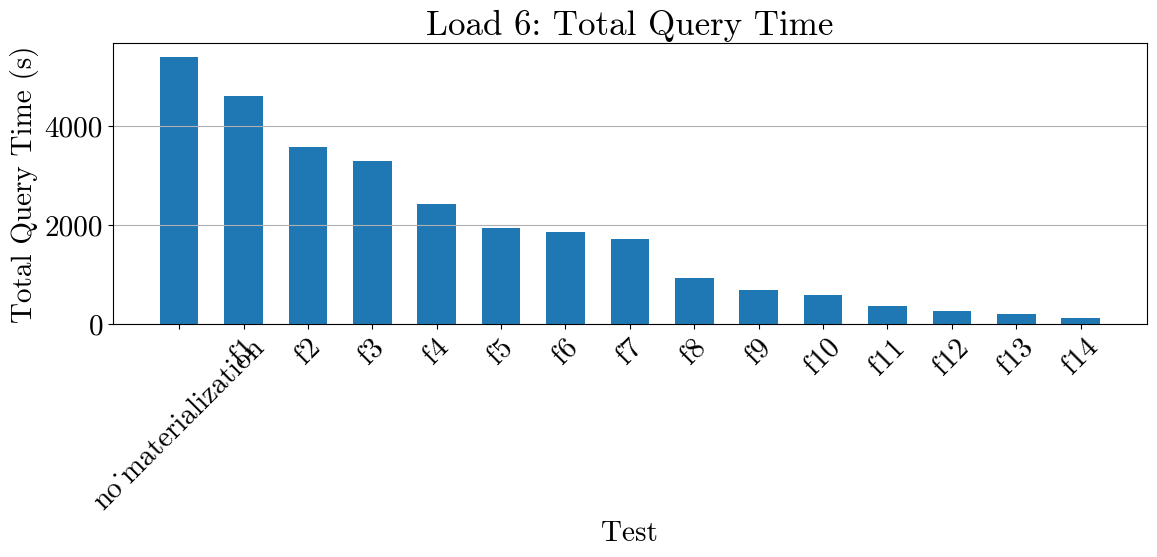

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


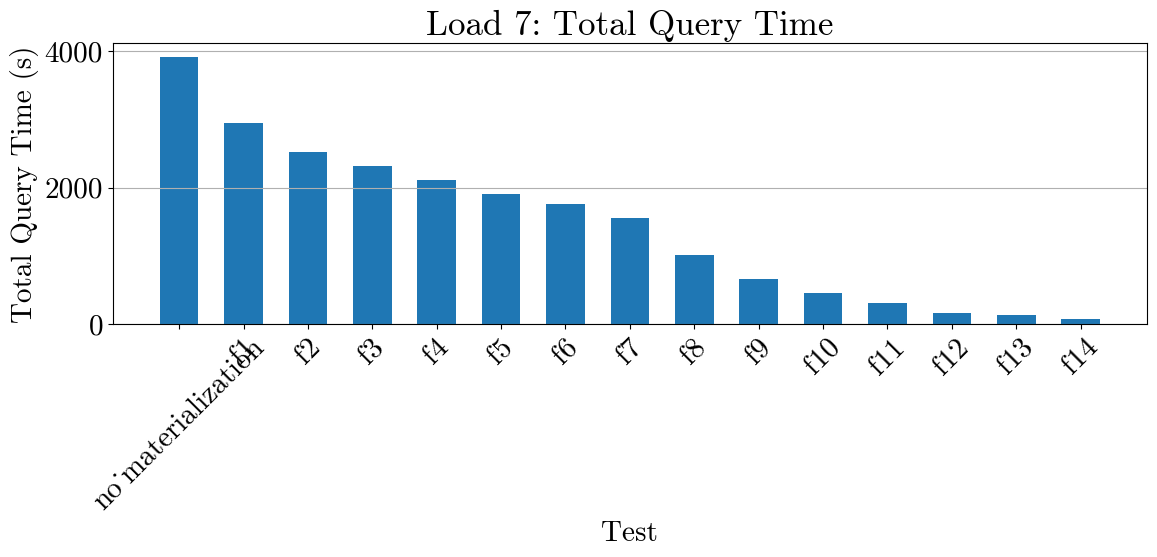

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


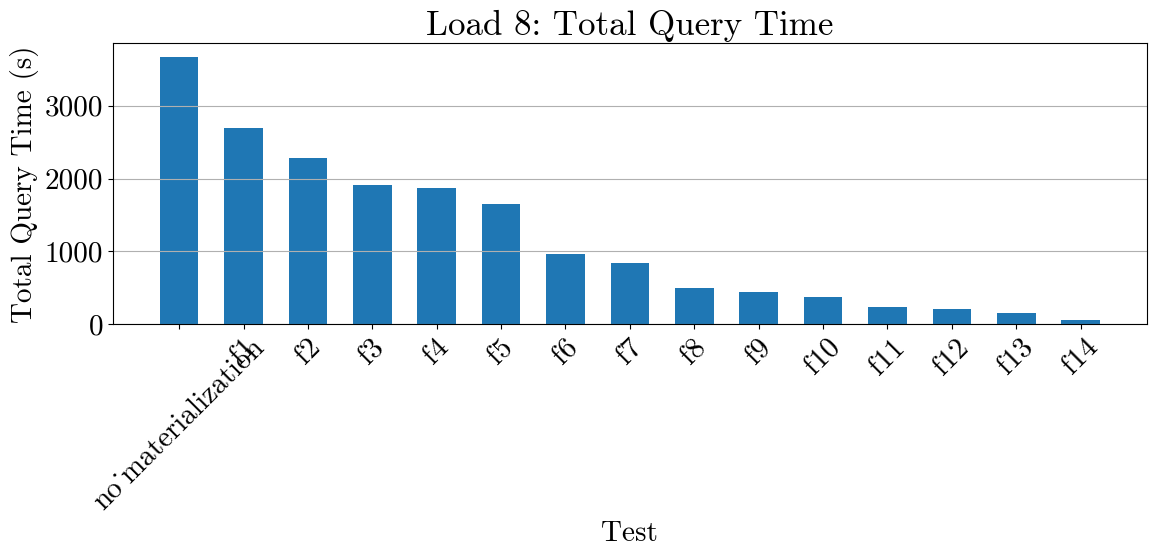

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


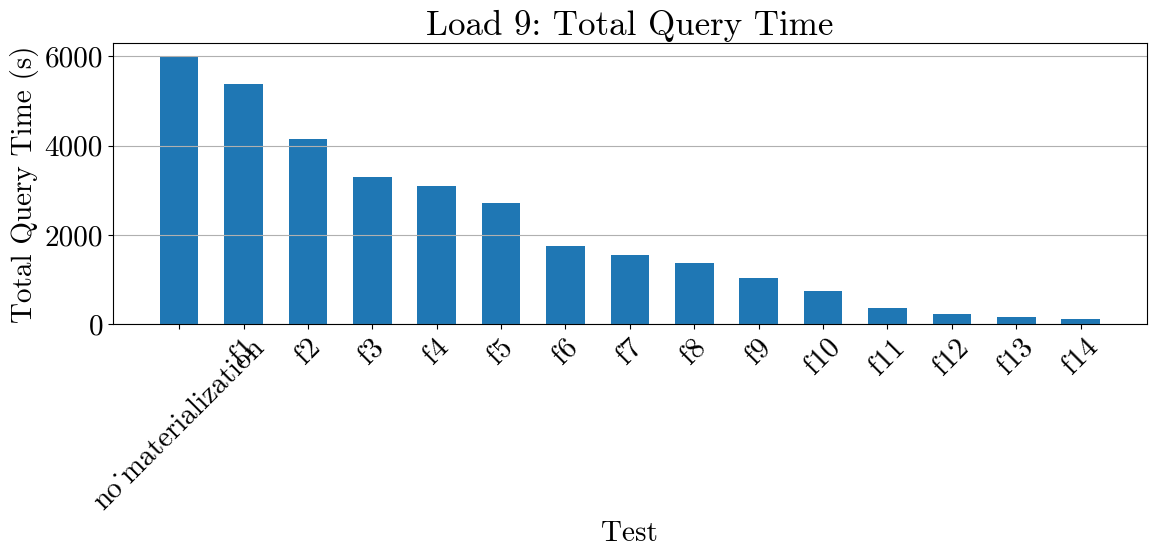

In [18]:
# Loop over each load value (0 to 9)
for load in range(10):
    # Filter the DataFrame for the current load and tests in test_order
    df_load = results_df[(results_df["Load"] == load) & (results_df["Test"].isin(test_order_frequency))].copy()
    
    # Ensure tests are ordered as defined in test_order
    df_load["Test"] = pd.Categorical(df_load["Test"], categories=test_order_frequency, ordered=True)

    # Instead of sorting by mean, we sort by the numeric value from shorten_label_into_number
    df_load = df_load.sort_values(by="Test", key=lambda col: col.map(shorten_label_into_number))
    
    # Create plot for current load
    plot_load_results(df_load, load, strategy = 'frequency')


# Schema

/tmp/ipykernel_1187797/1225945818.py:48: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


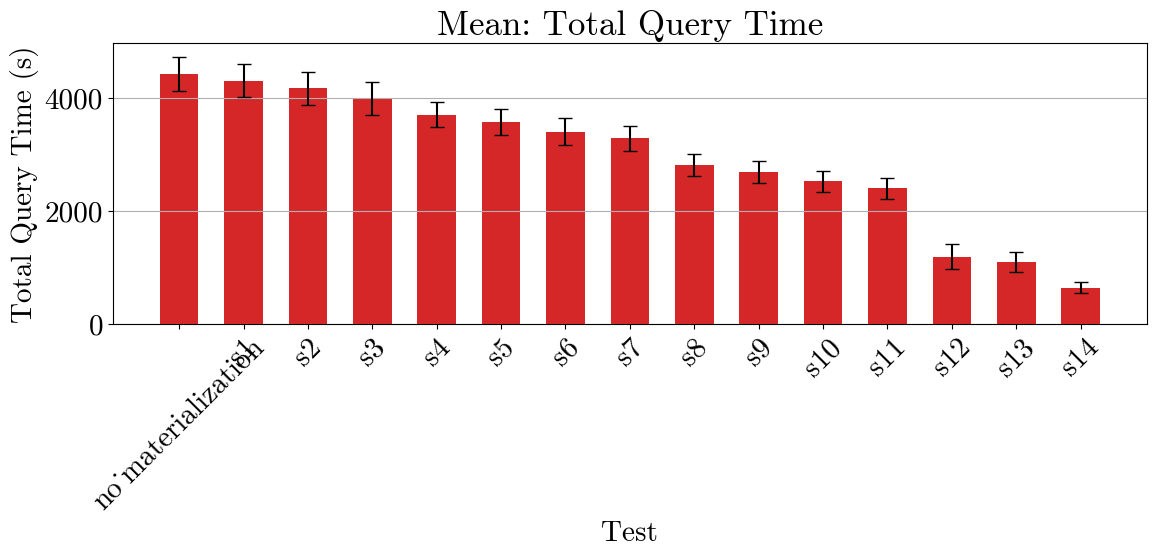

In [19]:
results_df = load_results_df(RESULTS_PATH, strategy='schema')
results_mean_df = create_mean_df(results_df)
results_mean_df = prepare_df_for_plot(results_mean_df, strategy = 'schema')
plot_mean_results(results_mean_df, strategy = 'schema')


/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


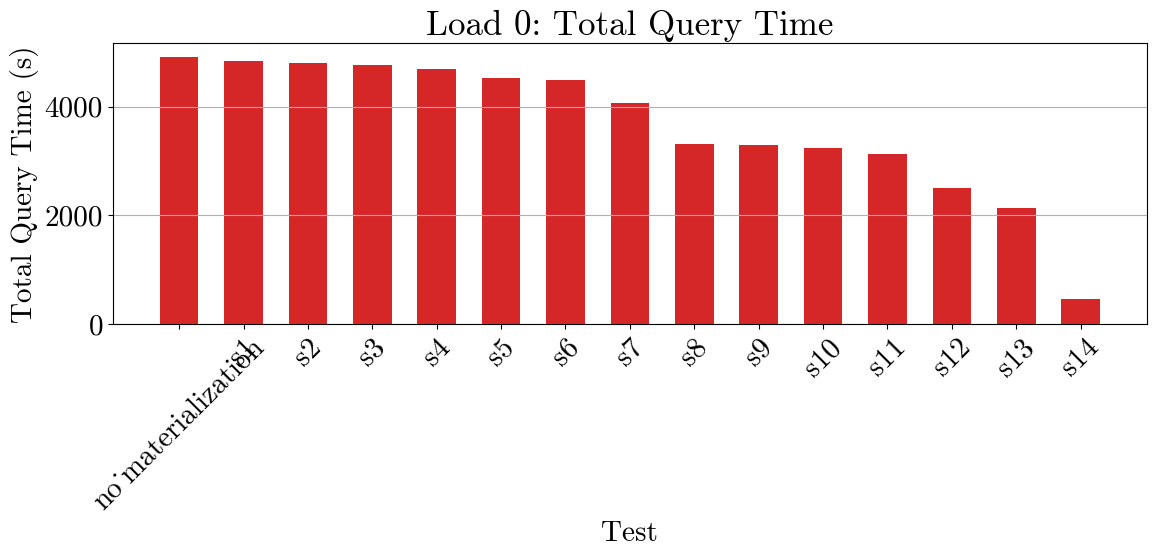

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


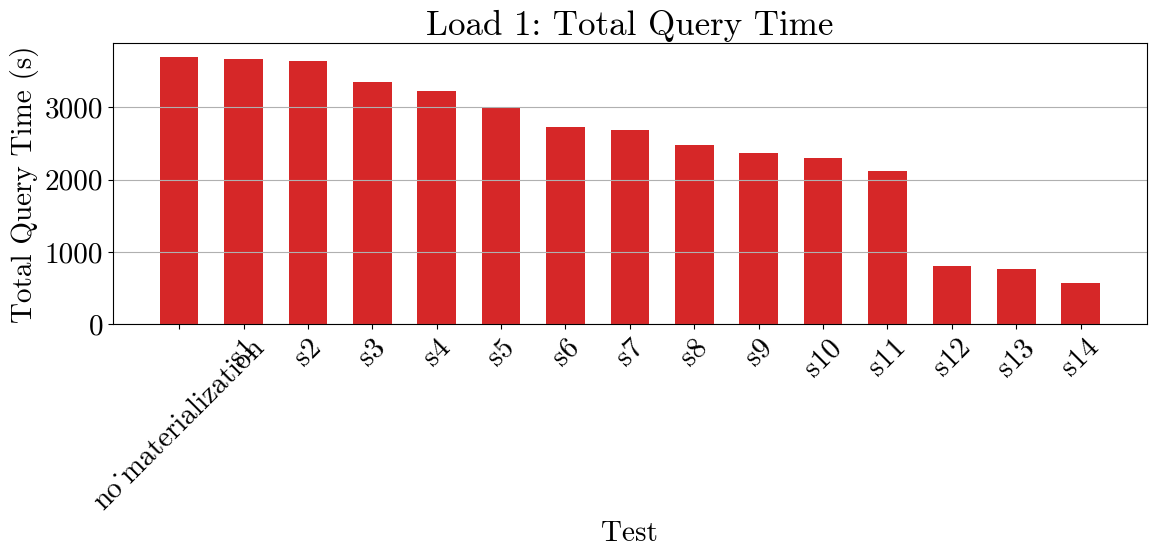

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


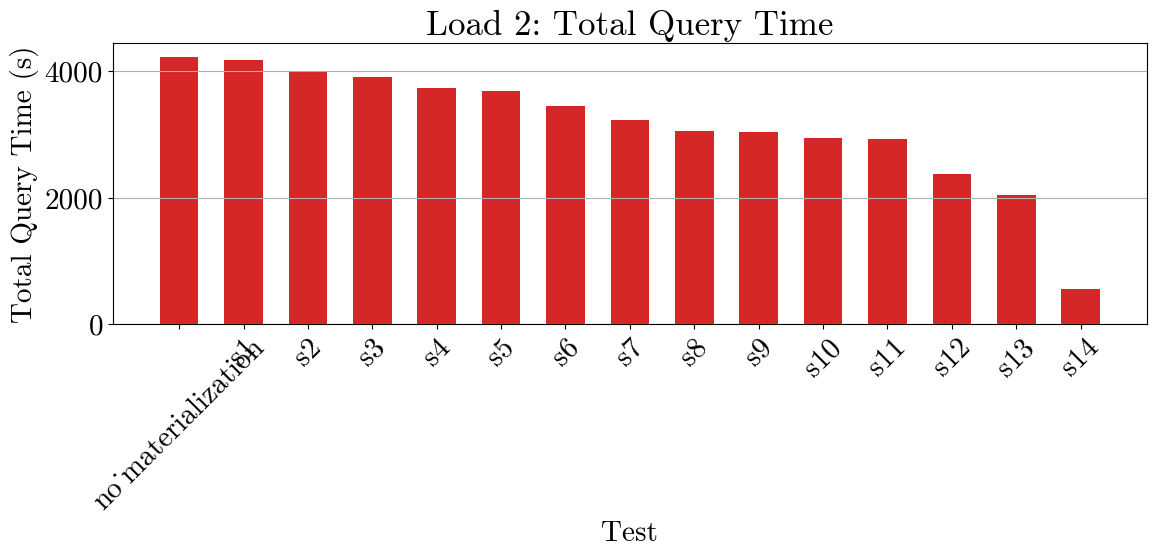

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


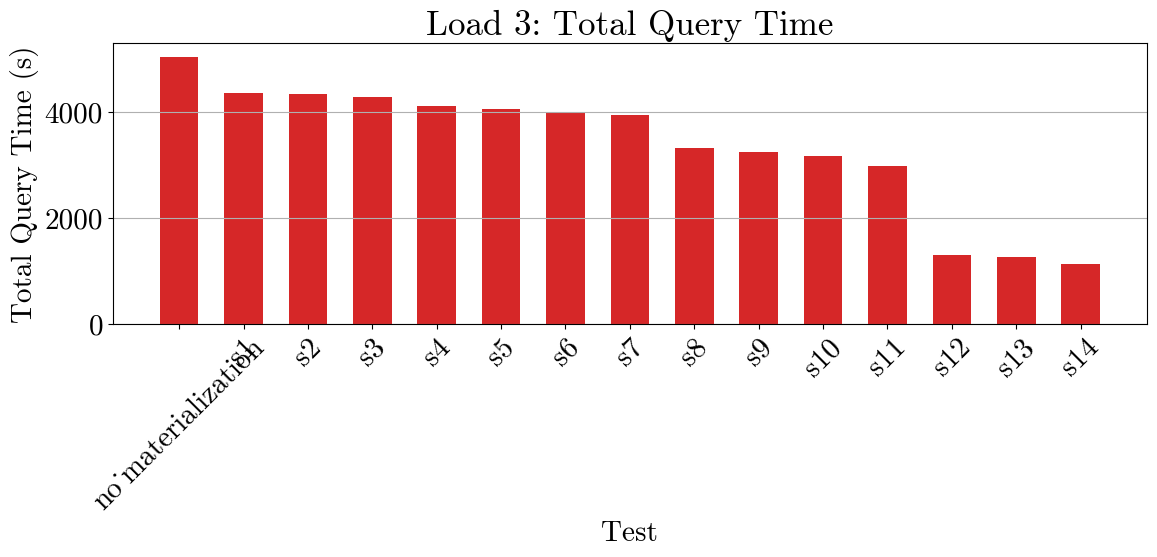

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


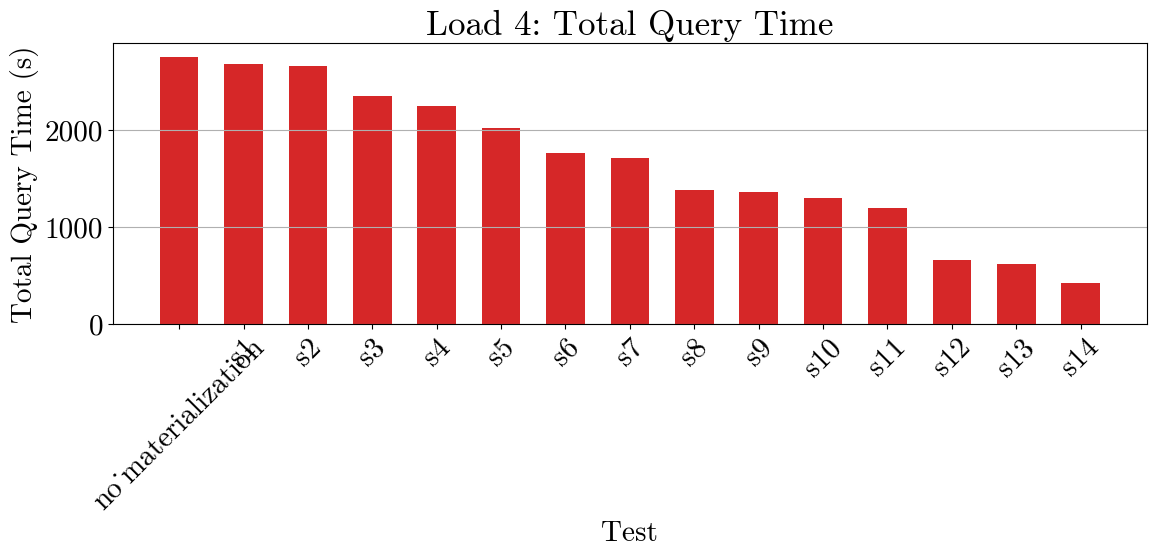

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


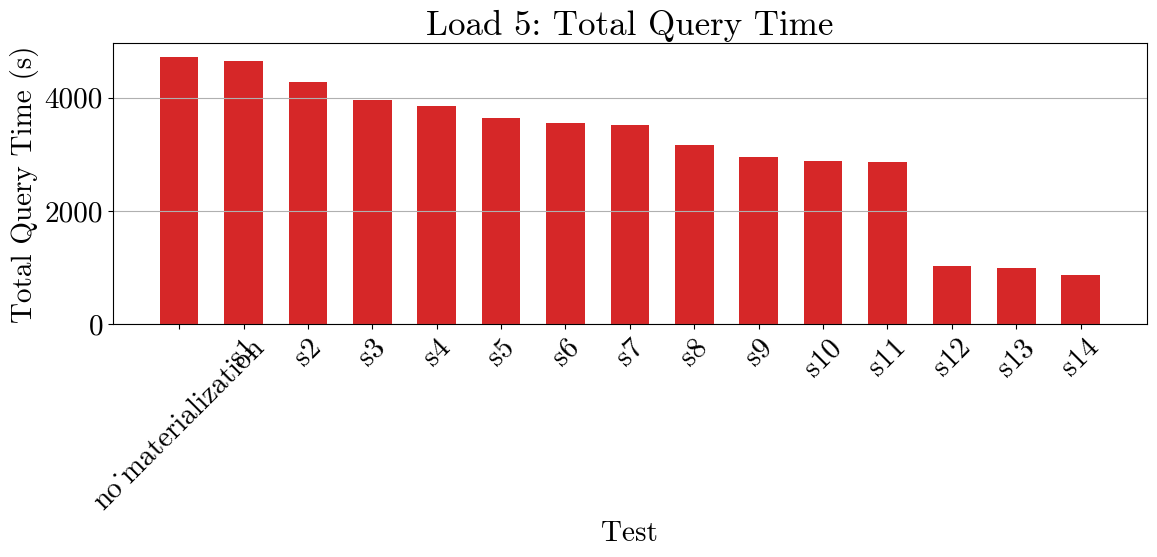

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


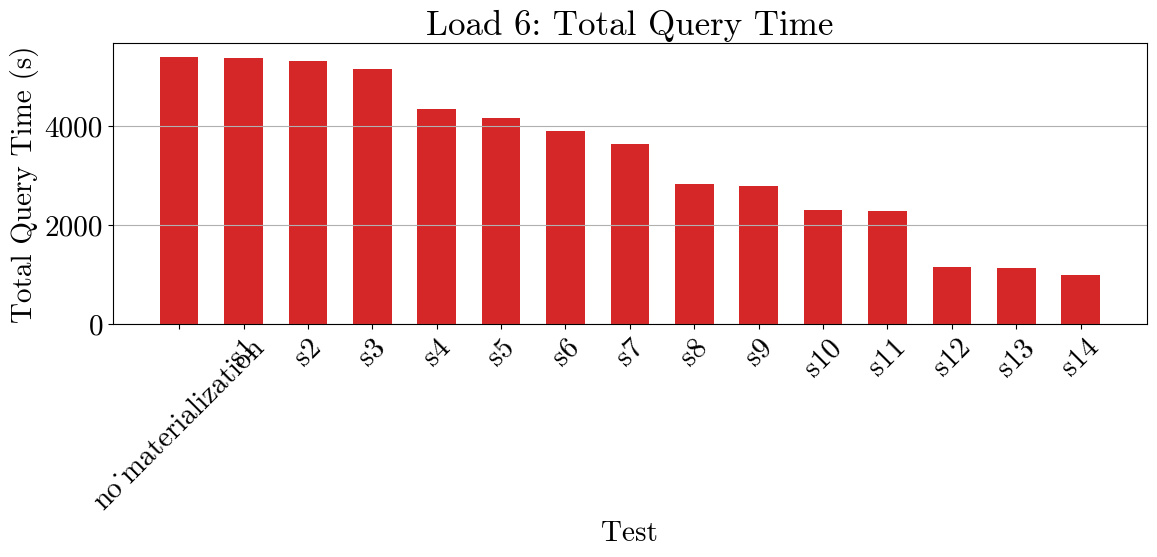

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


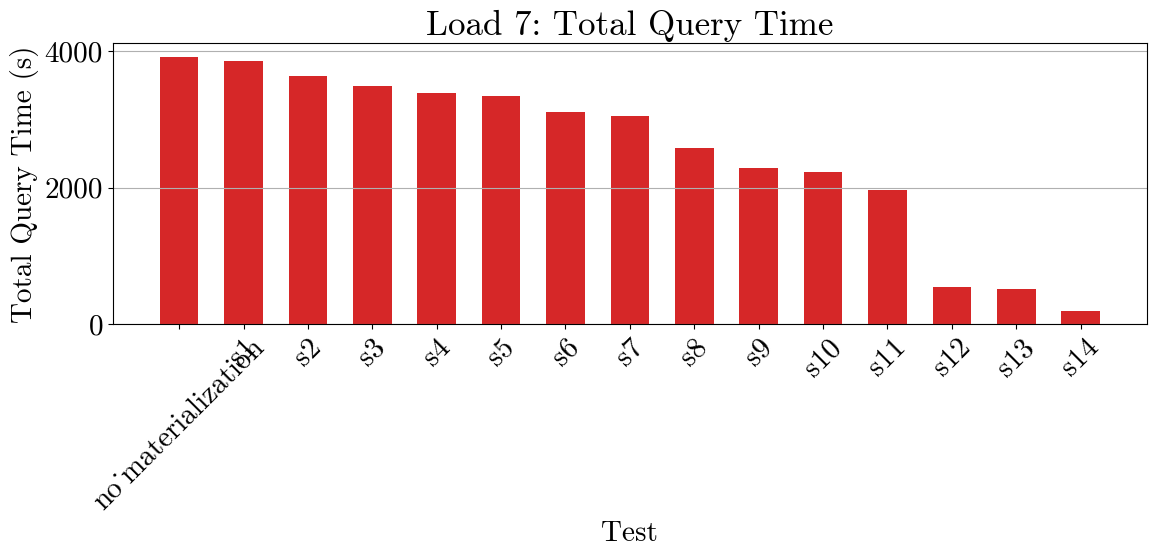

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


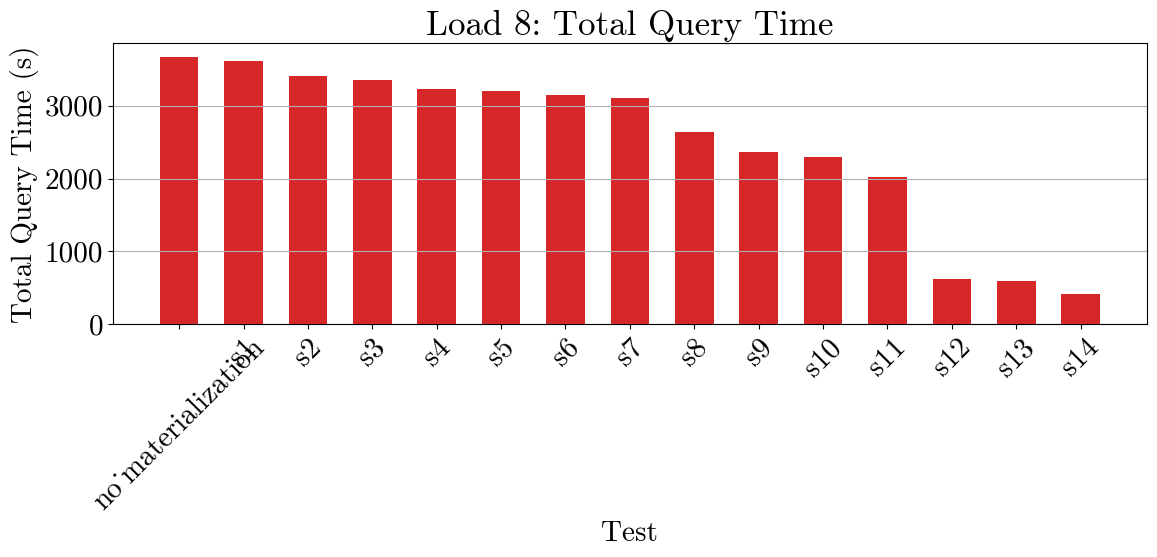

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


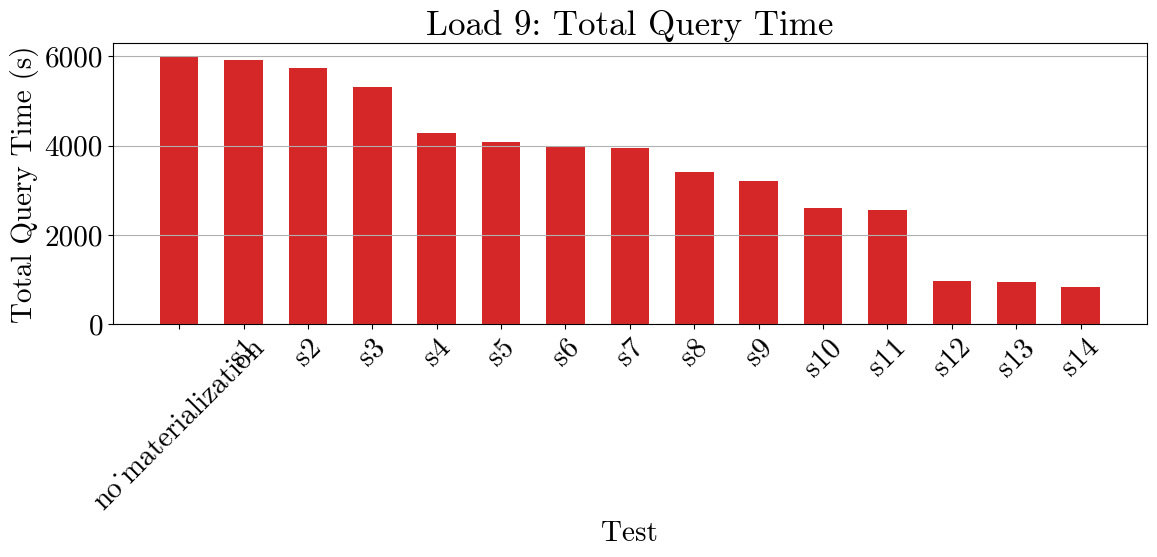

In [20]:
# Loop over each load value (0 to 9)
for load in range(10):
    # Filter the DataFrame for the current load and tests in test_order
    df_load = results_df[(results_df["Load"] == load) & (results_df["Test"].isin(test_order_schema))].copy()
    
    # Ensure tests are ordered as defined in test_order
    df_load["Test"] = pd.Categorical(df_load["Test"], categories=test_order_schema, ordered=True)

    # Instead of sorting by mean, we sort by the numeric value from shorten_label_into_number
    df_load = df_load.sort_values(by="Test", key=lambda col: col.map(shorten_label_into_number))
    
    # Create plot for current load
    plot_load_results(df_load, load, strategy = 'schema')


# Load based

/tmp/ipykernel_1187797/1225945818.py:48: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


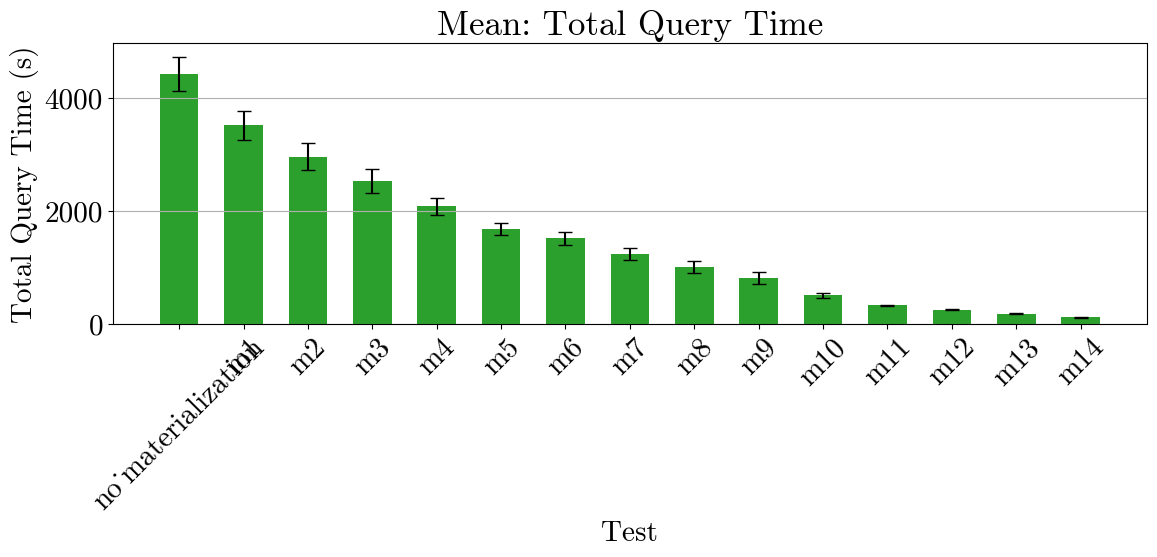

In [21]:
results_df = load_results_df(RESULTS_PATH, strategy='load')
results_mean_df = create_mean_df(results_df)
results_mean_df = prepare_df_for_plot(results_mean_df, strategy = 'load')
plot_mean_results(results_mean_df, strategy = 'load')


/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


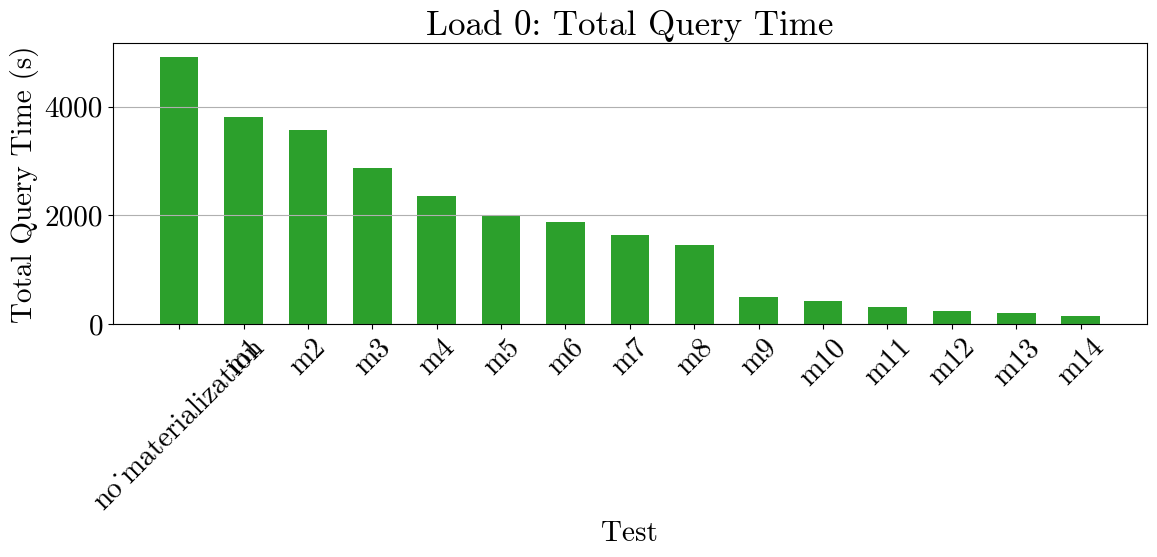

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


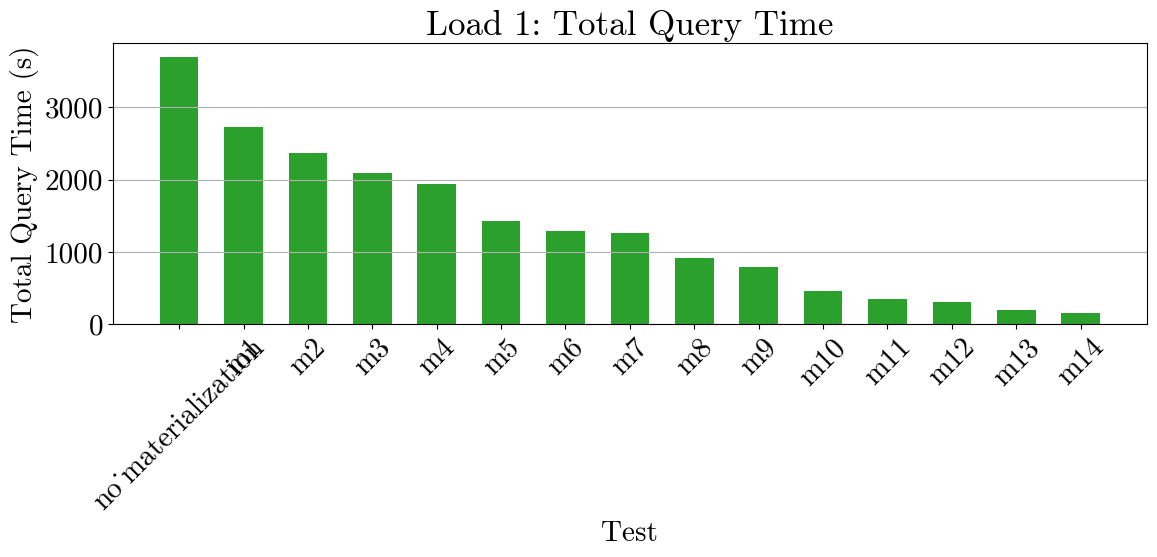

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


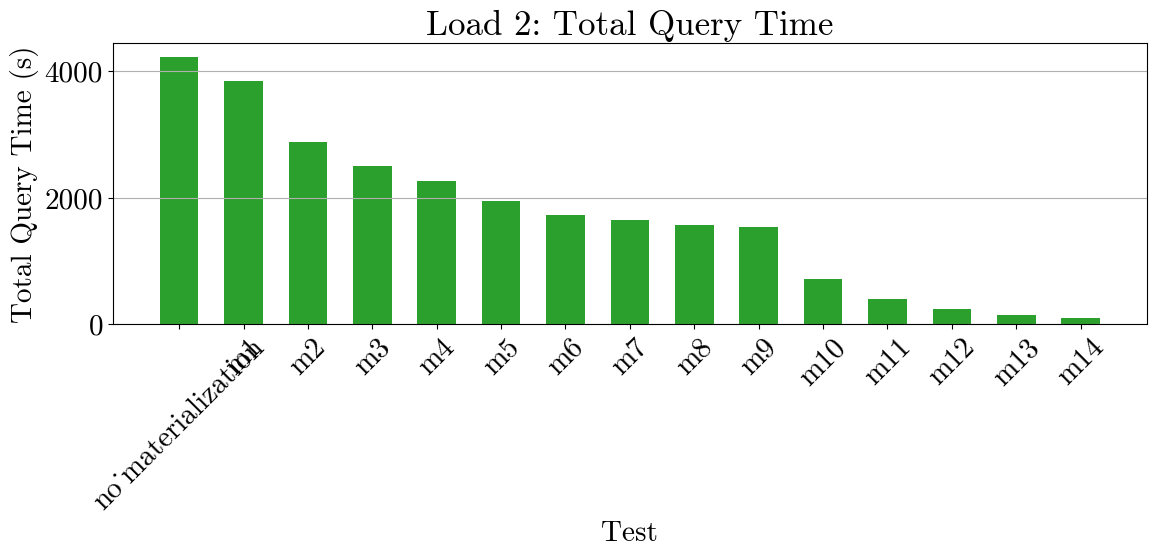

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


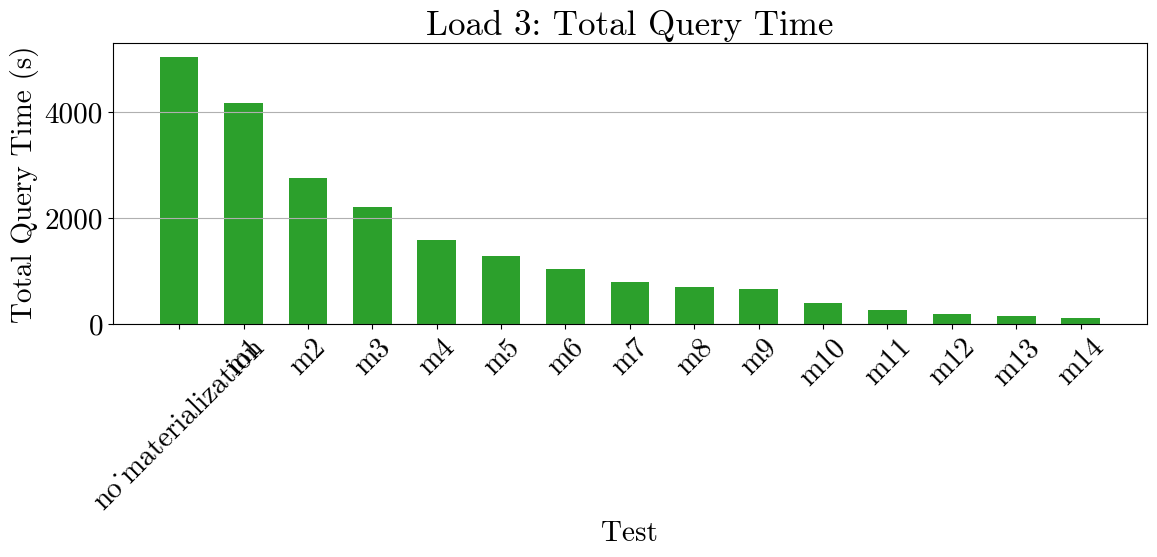

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


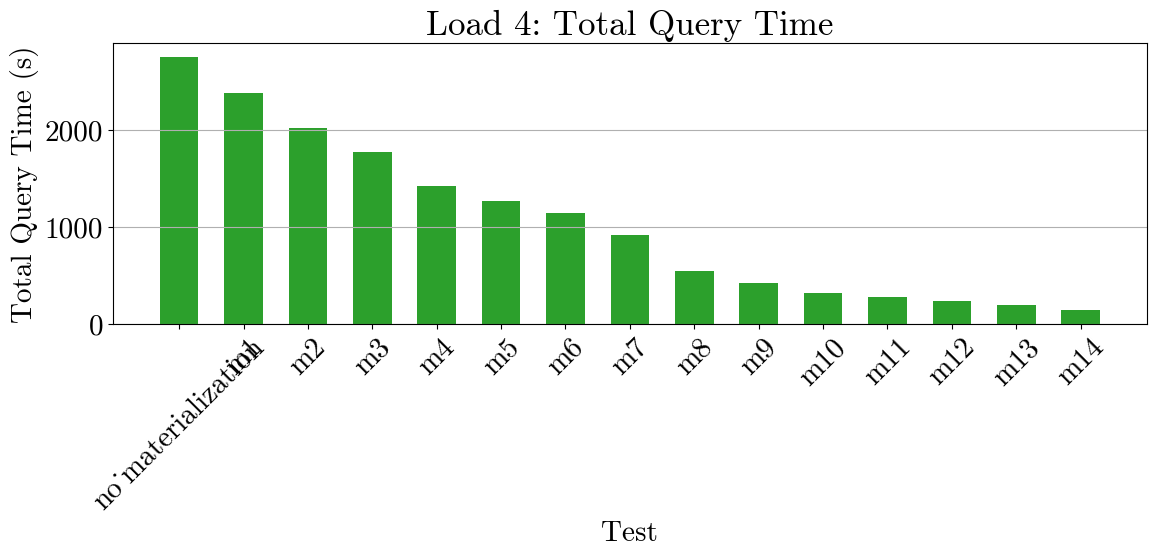

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


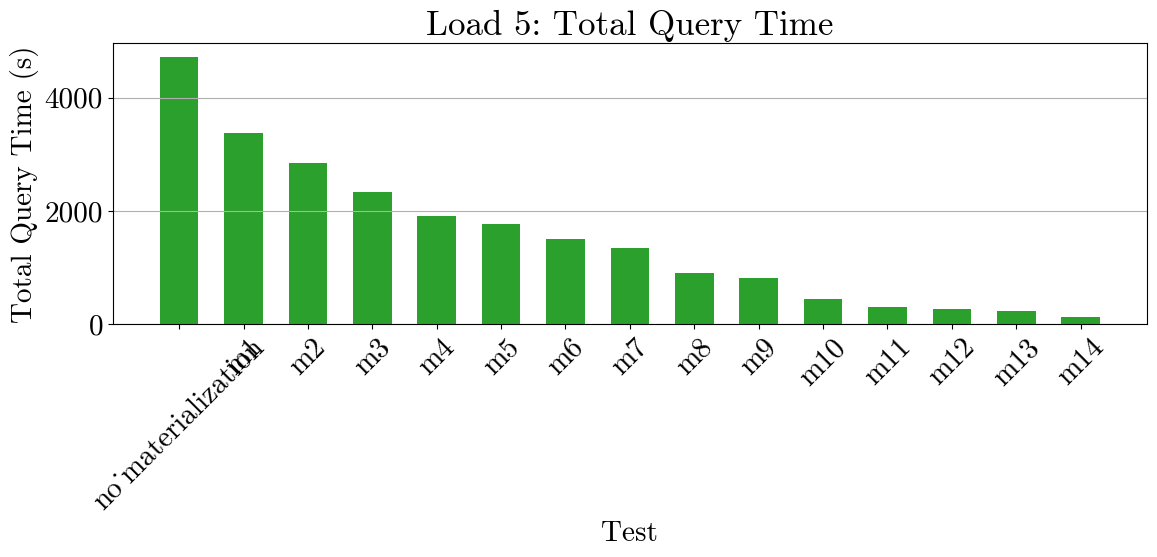

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


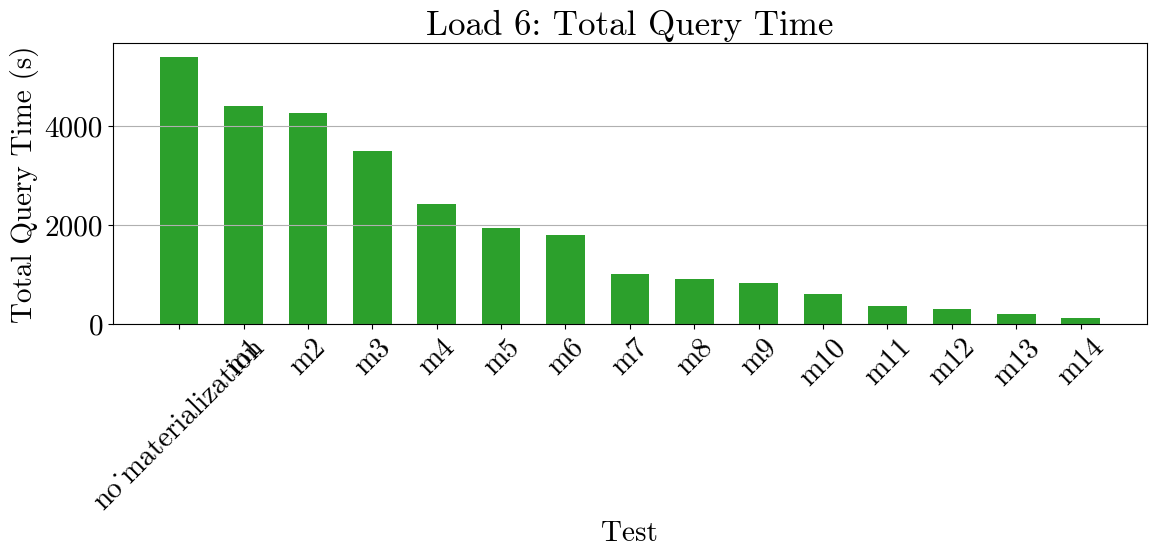

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


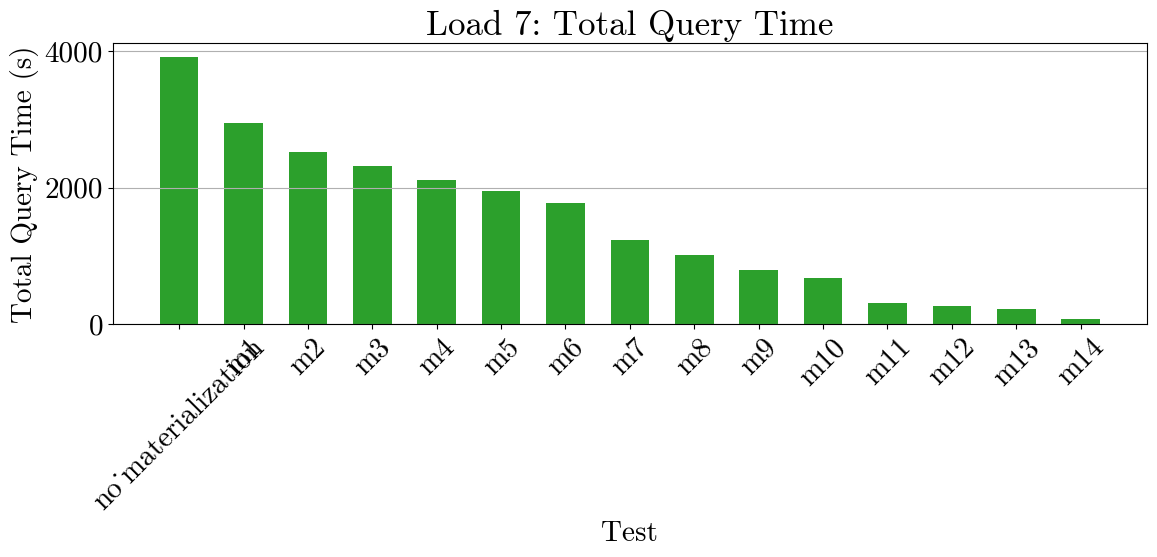

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


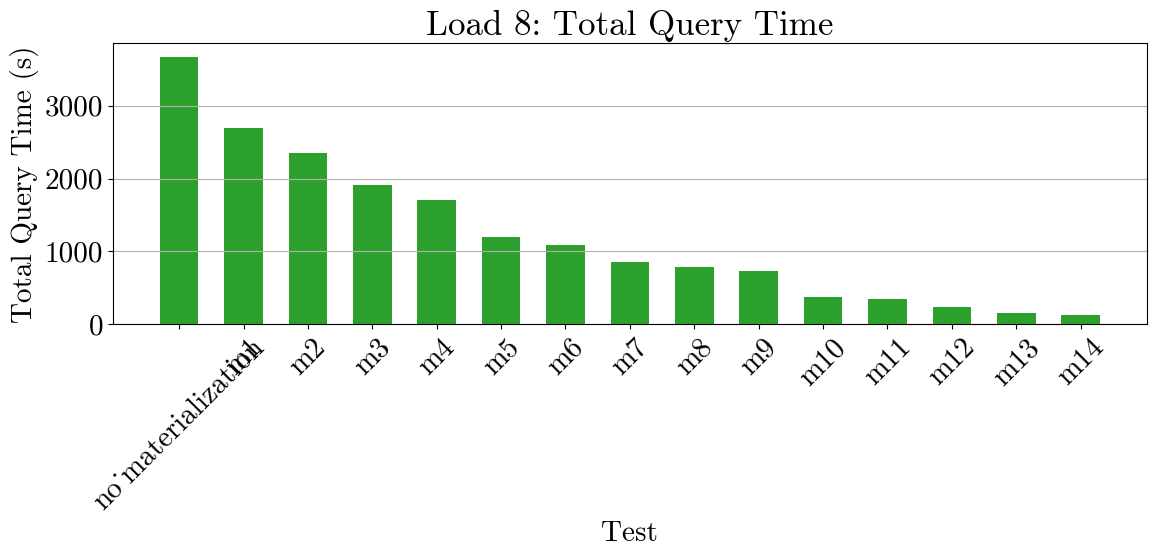

/tmp/ipykernel_1187797/1225945818.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(12, 6))


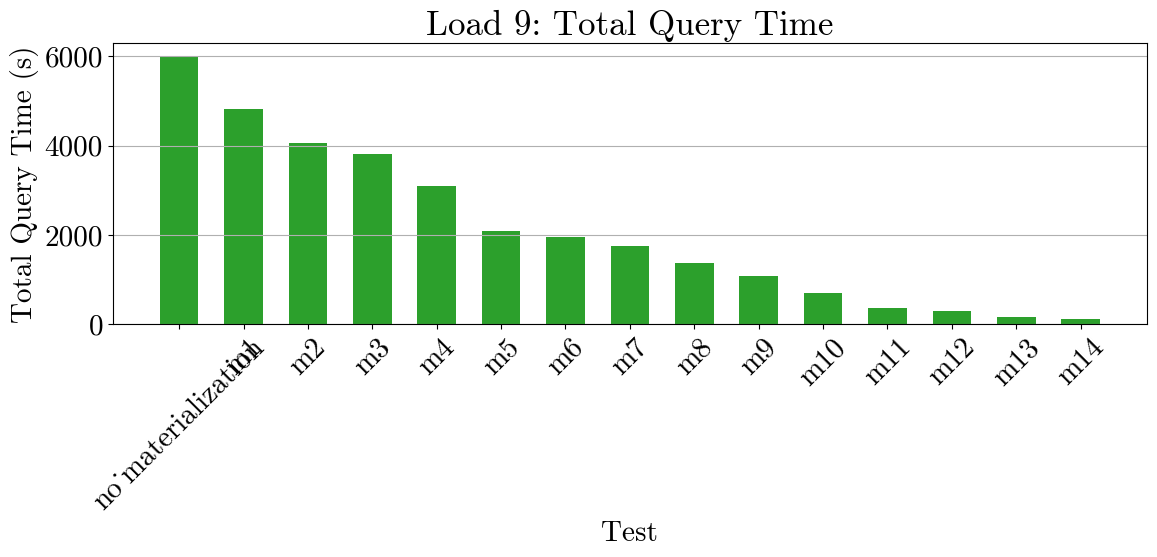

In [22]:
# Loop over each load value (0 to 9)
for load in range(10):
    # Filter the DataFrame for the current load and tests in test_order
    df_load = results_df[(results_df["Load"] == load) & (results_df["Test"].isin(test_order_load))].copy()
    
    # Ensure tests are ordered as defined in test_order
    df_load["Test"] = pd.Categorical(df_load["Test"], categories=test_order_load, ordered=True)

    # Instead of sorting by mean, we sort by the numeric value from shorten_label_into_number
    df_load = df_load.sort_values(by="Test", key=lambda col: col.map(shorten_label_into_number))
    
    # Create plot for current load
    plot_load_results(df_load, load, strategy = 'load')


# Combined

In [23]:
def plot_grouped_comparison_individual(frequency_mean_df, schema_mean_df, load_mean_df, title="Strategy Comparison", show_values=False):
    """
    Create a grouped bar chart comparing all three strategies.
    Each test has three bars side by side.
    """
    # Add numeric labels for merging
    frequency_mean_df["test_num"] = frequency_mean_df["Test"].map(shorten_label_into_number)
    schema_mean_df["test_num"] = schema_mean_df["Test"].map(shorten_label_into_number) 
    load_mean_df["test_num"] = load_mean_df["Test"].map(shorten_label_into_number)

    # Merge the dataframes on test_num column
    merged_df = pd.merge(pd.merge(frequency_mean_df, schema_mean_df, on="test_num", suffixes=("_frequency", "_schema")), 
                        load_mean_df, on="test_num")
    merged_df = merged_df.rename(columns={"Total Query Time": "Total Query Time_load"})
    
    # Create shortened labels for x-axis
    short_labels = [shorten_label_into_number(test) for test in merged_df["Test_frequency"]]
    
    # Define positions and bar width
    x = np.arange(len(merged_df))
    bar_width = 0.25
    
    # Create figure
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Plot Frequency bars
    bars1 = ax.bar(x - bar_width, merged_df["Total Query Time_frequency"], bar_width, 
                   label="Frequency", alpha=0.8, capsize=5,)
    
    # Plot Schema bars
    bars2 = ax.bar(x, merged_df["Total Query Time_schema"], bar_width,
                   label="Schema", alpha=0.8, capsize=5,)
    
    # Plot Load bars  
    bars3 = ax.bar(x + bar_width, merged_df["Total Query Time_load"], bar_width,
                   label="Load", alpha=0.8, capsize=5)
    
    # Customize the plot
    ax.set_xlabel("Test")
    ax.set_ylabel("Total Query Time (s)")
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, rotation=45)
    ax.legend()
    ax.grid(True, axis="y", alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            height3 = bar3.get_height()
            ax.text(bar1.get_x() + bar1.get_width()/2., height1,
                    f'{height1:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar2.get_x() + bar2.get_width()/2., height2,
                    f'{height2:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar3.get_x() + bar3.get_width()/2., height3,
                    f'{height3:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()


def plot_line_comparison_individual(frequency_df, schema_df, load_df, load_num, title="Strategy Line Comparison", show_values=False):
    """
    Create overlayed line plots comparing all three strategies for a specific load.
    """
    # Filter for specific load and create copies to avoid SettingWithCopyWarning
    frequency_load_df = frequency_df[frequency_df["Load"] == load_num].copy()
    schema_load_df = schema_df[schema_df["Load"] == load_num].copy()
    load_load_df = load_df[load_df["Load"] == load_num].copy()

    # Add numeric labels for merging using loc
    frequency_load_df.loc[:, "test_num"] = frequency_load_df["Test"].map(shorten_label_into_number)
    schema_load_df.loc[:, "test_num"] = schema_load_df["Test"].map(shorten_label_into_number)
    load_load_df.loc[:, "test_num"] = load_load_df["Test"].map(shorten_label_into_number)

    # Merge the dataframes on test_num column
    merged_df = pd.merge(pd.merge(frequency_load_df, schema_load_df, on="test_num", suffixes=("_frequency", "_schema")), 
                        load_load_df, on="test_num")
    merged_df = merged_df.rename(columns={"Total Query Time": "Total Query Time_load"})
    
    # Create shortened labels for x-axis
    short_labels = [shorten_label_into_number(test) for test in merged_df["Test_frequency"]]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Plot Frequency line
    ax.plot(range(len(merged_df)), merged_df["Total Query Time_frequency"], 
            marker='o', linewidth=2, markersize=6, 
            label="Frequency")
    
    # Plot Schema line
    ax.plot(range(len(merged_df)), merged_df["Total Query Time_schema"],
            marker='^', linewidth=2, markersize=6,
            label="Schema")
    
    # Plot Load line
    ax.plot(range(len(merged_df)), merged_df["Total Query Time_load"],
            marker='s', linewidth=2, markersize=6,
            label="Load")
    
    # Customize the plot
    ax.set_xlabel("Test")
    ax.set_ylabel("Total Query Time (s)")
    ax.set_title(f"{title} - Load {load_num}")
    ax.set_xticks(range(len(merged_df)))
    ax.set_xticklabels(short_labels, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for i in range(len(merged_df)):
            ax.text(i, merged_df["Total Query Time_frequency"].iloc[i], 
                   f'{merged_df["Total Query Time_frequency"].iloc[i]:.1f}', 
                   ha='center', va='bottom', fontsize=8)
            ax.text(i, merged_df["Total Query Time_schema"].iloc[i],
                   f'{merged_df["Total Query Time_schema"].iloc[i]:.1f}',
                   ha='center', va='bottom', fontsize=8)
            ax.text(i, merged_df["Total Query Time_load"].iloc[i],
                   f'{merged_df["Total Query Time_load"].iloc[i]:.1f}',
                   ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [24]:
def plot_grouped_comparison_individual_load(frequency_df, schema_df, load_df, load_no, show_values=False):
    """
    Create a grouped bar chart comparing all three strategies.
    Each test has three bars side by side.
    """

    frequency_load_df = frequency_df[frequency_df["Load"] == load_no].copy()
    schema_load_df = schema_df[schema_df["Load"] == load_no].copy()
    load_load_df = load_df[load_df["Load"] == load_no].copy()


    title = f"Workload {load_no} Strategy Comparison, Twitter Dataset"
    # Add numeric labels for merging
    frequency_load_df.loc[:, "test_num"] = frequency_load_df["Test"].map(
        shorten_label_into_number)
    schema_load_df.loc[:, "test_num"] = schema_load_df["Test"].map(
        shorten_label_into_number)
    load_load_df.loc[:, "test_num"] = load_load_df["Test"].map(
        shorten_label_into_number)

    # Merge the dataframes on test_num column
    merged_df = pd.merge(pd.merge(frequency_load_df, schema_load_df, on="test_num", suffixes=("_frequency", "_schema")),
                         load_load_df, on="test_num")
    merged_df = merged_df.rename(
        columns={"Total Query Time": "Total Query Time_load"})

    # merged_df = merged_df.rename(
    #     columns={"mean": "mean_load", "stderr": "stderr_load"})

    # Create shortened labels for x-axis
    short_labels = [shorten_label_into_number(
        test) for test in merged_df["Test_frequency"]]

    # Define positions and bar width
    x = np.arange(len(merged_df))
    bar_width = 0.25

    # Create figure
    fig, ax = plt.subplots(figsize=(15, 8))
    for col in merged_df.columns:
        print(col)
    # Plot Schema bars
    bars1 = ax.bar(x - bar_width, merged_df["Total Query Time_schema"], bar_width,
                   label="Schema based", capsize=5, color='#d62728')

    # Plot Frequency bars
    bars2 = ax.bar(x, merged_df["Total Query Time_frequency"], bar_width,
                   label="Frequency based", capsize=5, color='#1f77b4')

    # Plot Load bars
    bars3 = ax.bar(x + bar_width, merged_df["Total Query Time_load"], bar_width,
                   label="Load based", capsize=5, color='#2ca02c')

    # Customize the plot
    ax.set_xlabel("No. Materialized Fields")
    ax.set_ylabel("Workload Execution Time (s)")
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, rotation=45)
    ax.legend()
    ax.grid(True, axis="y", alpha=0.3)

    # Add value labels if requested
    if show_values:
        for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            height3 = bar3.get_height()
            ax.text(bar1.get_x() + bar1.get_width()/2., height1,
                    f'{height1:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar2.get_x() + bar2.get_width()/2., height2,
                    f'{height2:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar3.get_x() + bar3.get_width()/2., height3,
                    f'{height3:.1f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

In [25]:
def plot_grouped_comparison(frequency_mean_df, schema_mean_df, load_mean_df, title="Strategy Comparison, Twitter Dataset", show_values=False):
    """
    Create a grouped bar chart comparing all three strategies.
    Each test has three bars side by side.
    """
    # Add numeric labels for merging
    frequency_mean_df["test_num"] = frequency_mean_df["Test"].map(shorten_label_into_number)
    schema_mean_df["test_num"] = schema_mean_df["Test"].map(shorten_label_into_number) 
    load_mean_df["test_num"] = load_mean_df["Test"].map(shorten_label_into_number)

    # Merge the dataframes on test_num column
    merged_df = pd.merge(pd.merge(frequency_mean_df, schema_mean_df, on="test_num", suffixes=("_frequency", "_schema")), 
                        load_mean_df, on="test_num")
    merged_df = merged_df.rename(columns={"mean": "mean_load", "stderr": "stderr_load"})
    
    # Create shortened labels for x-axis
    short_labels = [shorten_label_into_number(test) for test in merged_df["Test_frequency"]]
    
    # Define positions and bar width
    x = np.arange(len(merged_df))
    bar_width = 0.25
    
    # Create figure
    fig, ax = plt.subplots(figsize=(15, 8))
    
    
    # Plot Schema bars
    bars1 = ax.bar(x - bar_width, merged_df["mean_schema"], bar_width,
                   label="Schema based", capsize=5,
                   yerr=merged_df["stderr_schema"], color='#d62728')
    
    # Plot Frequency bars
    bars2 = ax.bar(x, merged_df["mean_frequency"], bar_width, 
                   label="Frequency based", capsize=5,
                   yerr=merged_df["stderr_frequency"], color='#1f77b4')
    
    # Plot Load bars  
    bars3 = ax.bar(x + bar_width, merged_df["mean_load"], bar_width,
                   label="Load based", capsize=5,
                   yerr=merged_df["stderr_load"], color='#2ca02c')
    
    # Customize the plot
    ax.set_xlabel("No. Materialized Fields")
    ax.set_ylabel("Workload Execution Time (s)")
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, rotation=45)
    ax.legend()
    ax.grid(True, axis="y", alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            height3 = bar3.get_height()
            ax.text(bar1.get_x() + bar1.get_width()/2., height1,
                    f'{height1:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar2.get_x() + bar2.get_width()/2., height2,
                    f'{height2:.1f}', ha='center', va='bottom', fontsize=8)
            ax.text(bar3.get_x() + bar3.get_width()/2., height3,
                    f'{height3:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()


def plot_line_comparison(frequency_mean_df, schema_mean_df, load_mean_df, title="Strategy Line Comparison", show_values=False):
    """
    Create overlayed line plots comparing all three strategies.
    """
    # Add numeric labels for merging
    frequency_mean_df["test_num"] = frequency_mean_df["Test"].map(shorten_label_into_number)
    schema_mean_df["test_num"] = schema_mean_df["Test"].map(shorten_label_into_number)
    load_mean_df["test_num"] = load_mean_df["Test"].map(shorten_label_into_number)

    # Merge the dataframes on test_num column
    merged_df = pd.merge(pd.merge(frequency_mean_df, schema_mean_df, on="test_num", suffixes=("_frequency", "_schema")), 
                        load_mean_df, on="test_num")
    merged_df = merged_df.rename(columns={"mean": "mean_load", "stderr": "stderr_load"})
    
    # Create shortened labels for x-axis
    short_labels = [shorten_label_into_number(test) for test in merged_df["Test_frequency"]]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Plot Frequency line
    ax.errorbar(range(len(merged_df)), merged_df["mean_frequency"], 
                yerr=merged_df["stderr_frequency"], 
                marker='o', linewidth=2, markersize=6, 
                label="Frequency", capsize=5)
    
    # Plot Schema line
    ax.errorbar(range(len(merged_df)), merged_df["mean_schema"],
                yerr=merged_df["stderr_schema"],
                marker='^', linewidth=2, markersize=6,
                label="Schema", capsize=5)
    
    # Plot Load line
    ax.errorbar(range(len(merged_df)), merged_df["mean_load"],
                yerr=merged_df["stderr_load"],
                marker='s', linewidth=2, markersize=6,
                label="Load", capsize=5)
    
    # Customize the plot
    ax.set_xlabel("Test")
    ax.set_ylabel("Total Query Time (s)")
    ax.set_title(title)
    ax.set_xticks(range(len(merged_df)))
    ax.set_xticklabels(short_labels, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for i in range(len(merged_df)):
            ax.text(i, merged_df["mean_frequency"].iloc[i], 
                   f'{merged_df["mean_frequency"].iloc[i]:.1f}', 
                   ha='center', va='bottom', fontsize=8)
            ax.text(i, merged_df["mean_schema"].iloc[i],
                   f'{merged_df["mean_schema"].iloc[i]:.1f}',
                   ha='center', va='bottom', fontsize=8)
            ax.text(i, merged_df["mean_load"].iloc[i],
                   f'{merged_df["mean_load"].iloc[i]:.1f}',
                   ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()


def plot_side_by_side_comparison(frequency_mean_df, schema_mean_df, load_mean_df, title="Strategy Side-by-Side", show_values=False):
    """
    Create side-by-side synchronized plots for easy comparison.
    """
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    
    # Determine common y-axis limits
    all_means = list(frequency_mean_df["mean"]) + list(schema_mean_df["mean"]) + list(load_mean_df["mean"])
    all_errors = list(frequency_mean_df["stderr"]) + list(schema_mean_df["stderr"]) + list(load_mean_df["stderr"])
    y_max = max([m + e for m, e in zip(all_means, all_errors)]) * 1.1
    y_min = 0
    
    # Plot Frequency
    short_labels1 = [shorten_label_into_number(test) for test in frequency_mean_df["Test"]]
    x1 = np.arange(len(frequency_mean_df))
    bars1 = ax1.bar(x1, frequency_mean_df["mean"], 
                    color=[colors["frequency"][test] for test in frequency_mean_df["Test"]],
                    yerr=frequency_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax1.set_xlabel("Test")
    ax1.set_ylabel("Total Query Time (s)")
    ax1.set_title("Frequency: Mean Total Query Time")
    ax1.set_xticks(x1)
    ax1.set_xticklabels(short_labels1, rotation=45)
    ax1.set_ylim(y_min, y_max)
    ax1.grid(True, axis="y", alpha=0.3)
    
    # Plot Schema
    short_labels2 = [shorten_label_into_number(test) for test in schema_mean_df["Test"]]
    x2 = np.arange(len(schema_mean_df))
    bars2 = ax2.bar(x2, schema_mean_df["mean"],
                    color=[colors["schema"][test] for test in schema_mean_df["Test"]],
                    yerr=schema_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax2.set_xlabel("Test")
    ax2.set_ylabel("Total Query Time (s)")
    ax2.set_title("Schema: Mean Total Query Time")
    ax2.set_xticks(x2)
    ax2.set_xticklabels(short_labels2, rotation=45)
    ax2.set_ylim(y_min, y_max)
    ax2.grid(True, axis="y", alpha=0.3)
    
    # Plot Load
    short_labels3 = [shorten_label_into_number(test) for test in load_mean_df["Test"]]
    x3 = np.arange(len(load_mean_df))
    bars3 = ax3.bar(x3, load_mean_df["mean"],
                    color=[colors["load"][test] for test in load_mean_df["Test"]],
                    yerr=load_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax3.set_xlabel("Test")
    ax3.set_ylabel("Total Query Time (s)")
    ax3.set_title("Load: Mean Total Query Time")
    ax3.set_xticks(x3)
    ax3.set_xticklabels(short_labels3, rotation=45)
    ax3.set_ylim(y_min, y_max)
    ax3.grid(True, axis="y", alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for ax, bars in [(ax1, bars1), (ax2, bars2), (ax3, bars3)]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()


def plot_vertical_comparison(frequency_mean_df, schema_mean_df, load_mean_df, title="Strategy Vertical Comparison", show_values=False):
    """
    Create vertically stacked synchronized plots for easy comparison.
    """
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))
    
    # Determine common y-axis limits
    all_means = list(frequency_mean_df["mean"]) + list(schema_mean_df["mean"]) + list(load_mean_df["mean"])
    all_errors = list(frequency_mean_df["stderr"]) + list(schema_mean_df["stderr"]) + list(load_mean_df["stderr"])
    y_max = max([m + e for m, e in zip(all_means, all_errors)]) * 1.1
    y_min = 0
    
    # Plot Frequency
    short_labels1 = [shorten_label_into_number(test) for test in frequency_mean_df["Test"]]
    x1 = np.arange(len(frequency_mean_df))
    bars1 = ax1.bar(x1, frequency_mean_df["mean"], 
                    color=[colors["frequency"][test] for test in frequency_mean_df["Test"]],
                    yerr=frequency_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax1.set_ylabel("Total Query Time (s)")
    ax1.set_title("Frequency: Mean Total Query Time")
    ax1.set_xticks(x1)
    ax1.set_xticklabels(short_labels1, rotation=45)
    ax1.set_ylim(y_min, y_max)
    ax1.grid(True, axis="y", alpha=0.3)
    
    # Plot Schema
    short_labels2 = [shorten_label_into_number(test) for test in schema_mean_df["Test"]]
    x2 = np.arange(len(schema_mean_df))
    bars2 = ax2.bar(x2, schema_mean_df["mean"],
                    color=[colors["schema"][test] for test in schema_mean_df["Test"]],
                    yerr=schema_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax2.set_ylabel("Total Query Time (s)")
    ax2.set_title("Schema: Mean Total Query Time")
    ax2.set_xticks(x2)
    ax2.set_xticklabels(short_labels2, rotation=45)
    ax2.set_ylim(y_min, y_max)
    ax2.grid(True, axis="y", alpha=0.3)
    
    # Plot Load
    short_labels3 = [shorten_label_into_number(test) for test in load_mean_df["Test"]]
    x3 = np.arange(len(load_mean_df))
    bars3 = ax3.bar(x3, load_mean_df["mean"],
                    color=[colors["load"][test] for test in load_mean_df["Test"]],
                    yerr=load_mean_df["stderr"], capsize=5, alpha=0.8)
    
    ax3.set_xlabel("Test")
    ax3.set_ylabel("Total Query Time (s)")
    ax3.set_title("Load: Mean Total Query Time")
    ax3.set_xticks(x3)
    ax3.set_xticklabels(short_labels3, rotation=45)
    ax3.set_ylim(y_min, y_max)
    ax3.grid(True, axis="y", alpha=0.3)
    
    # Add value labels if requested
    if show_values:
        for ax, bars in [(ax1, bars1), (ax2, bars2), (ax3, bars3)]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


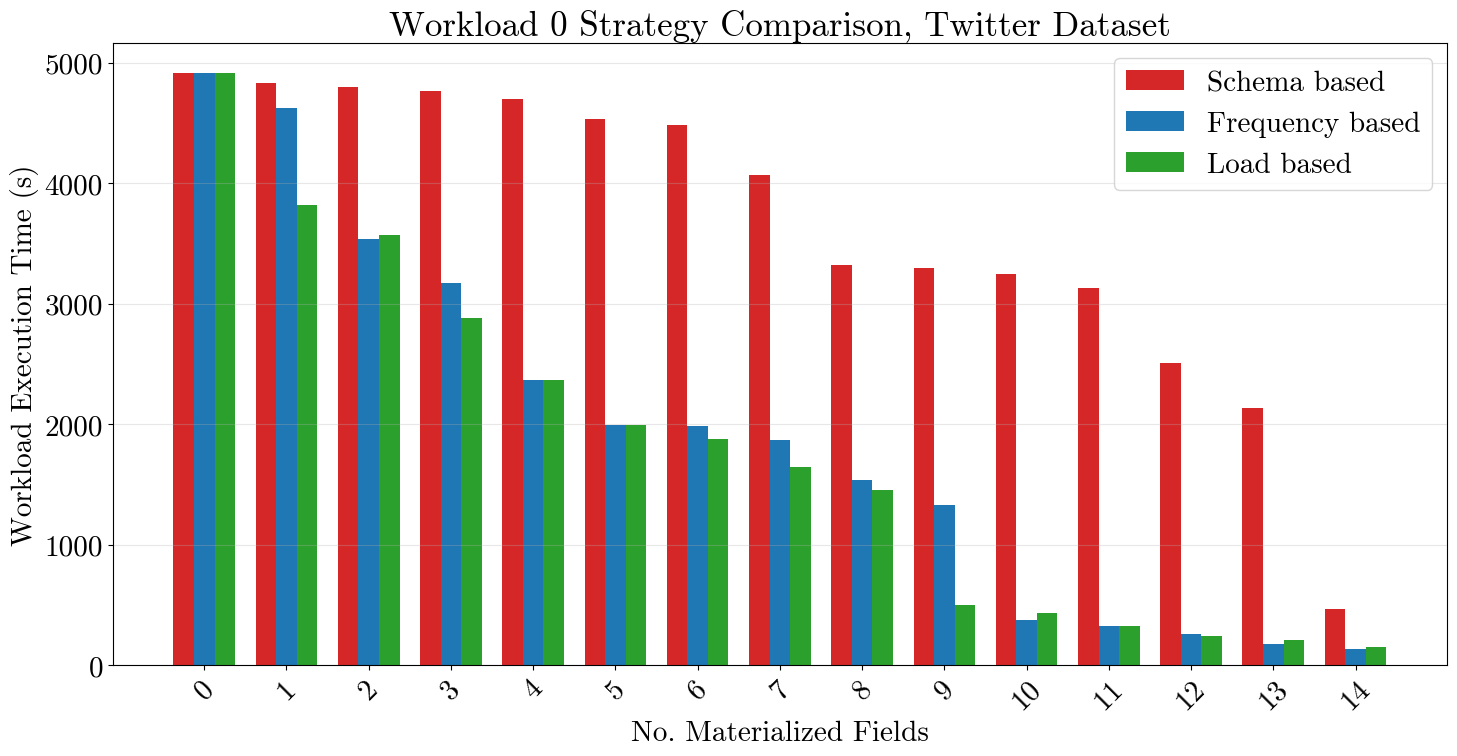

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


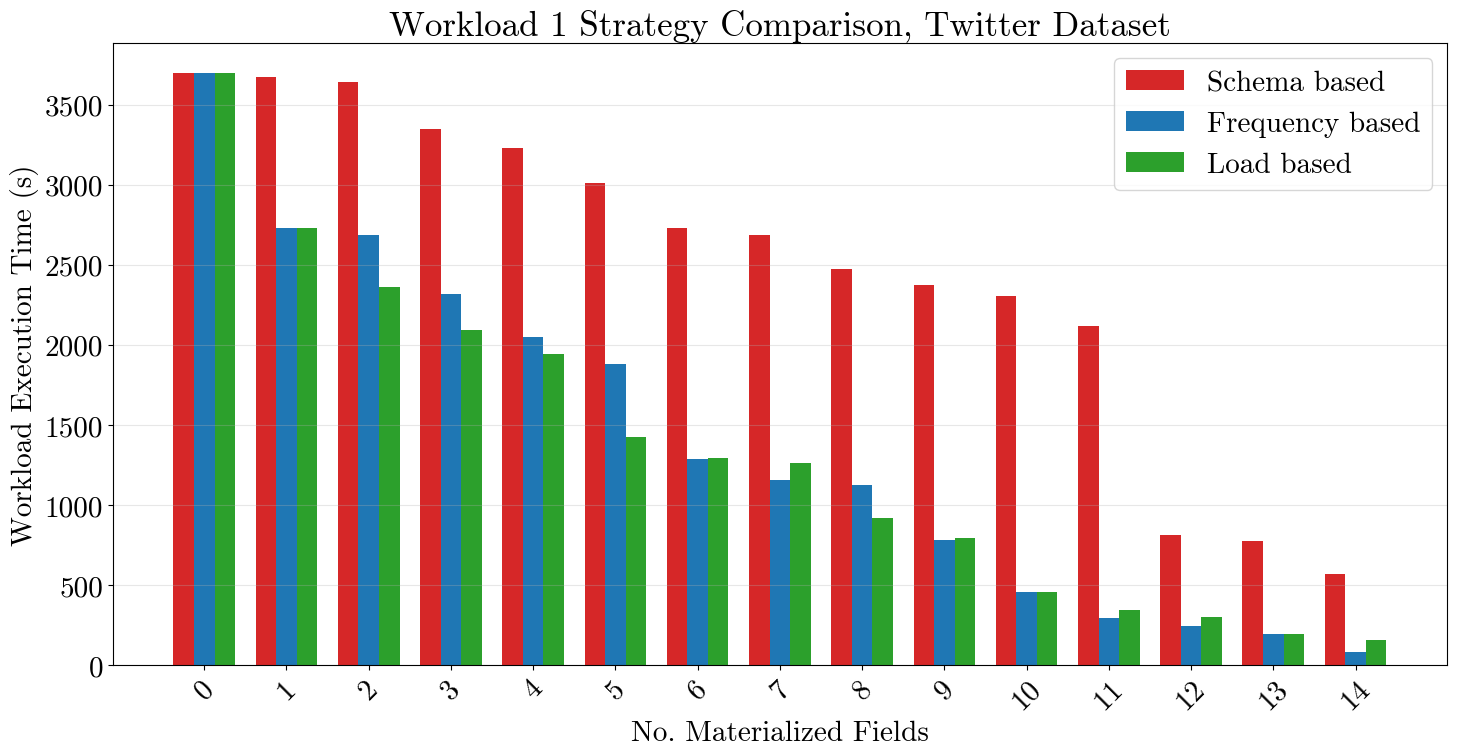

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


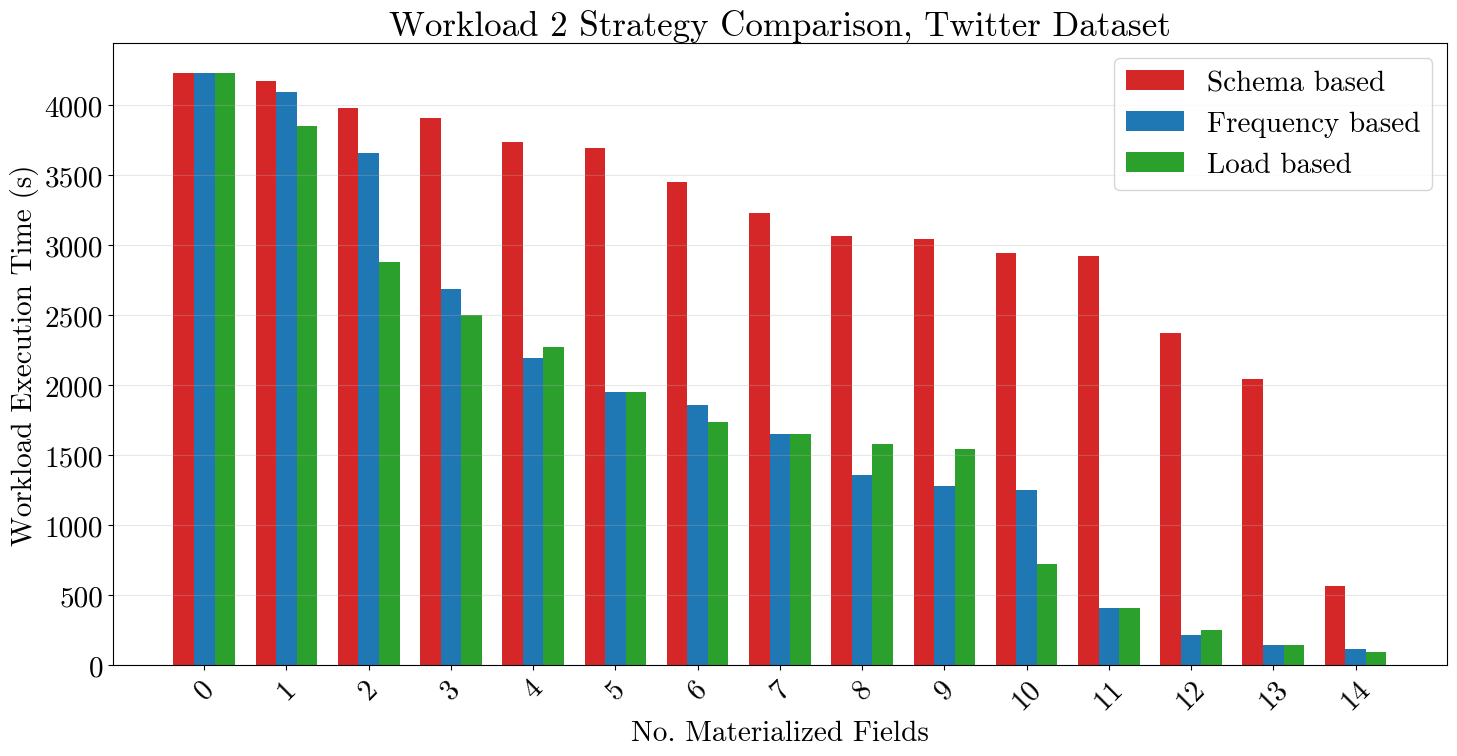

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


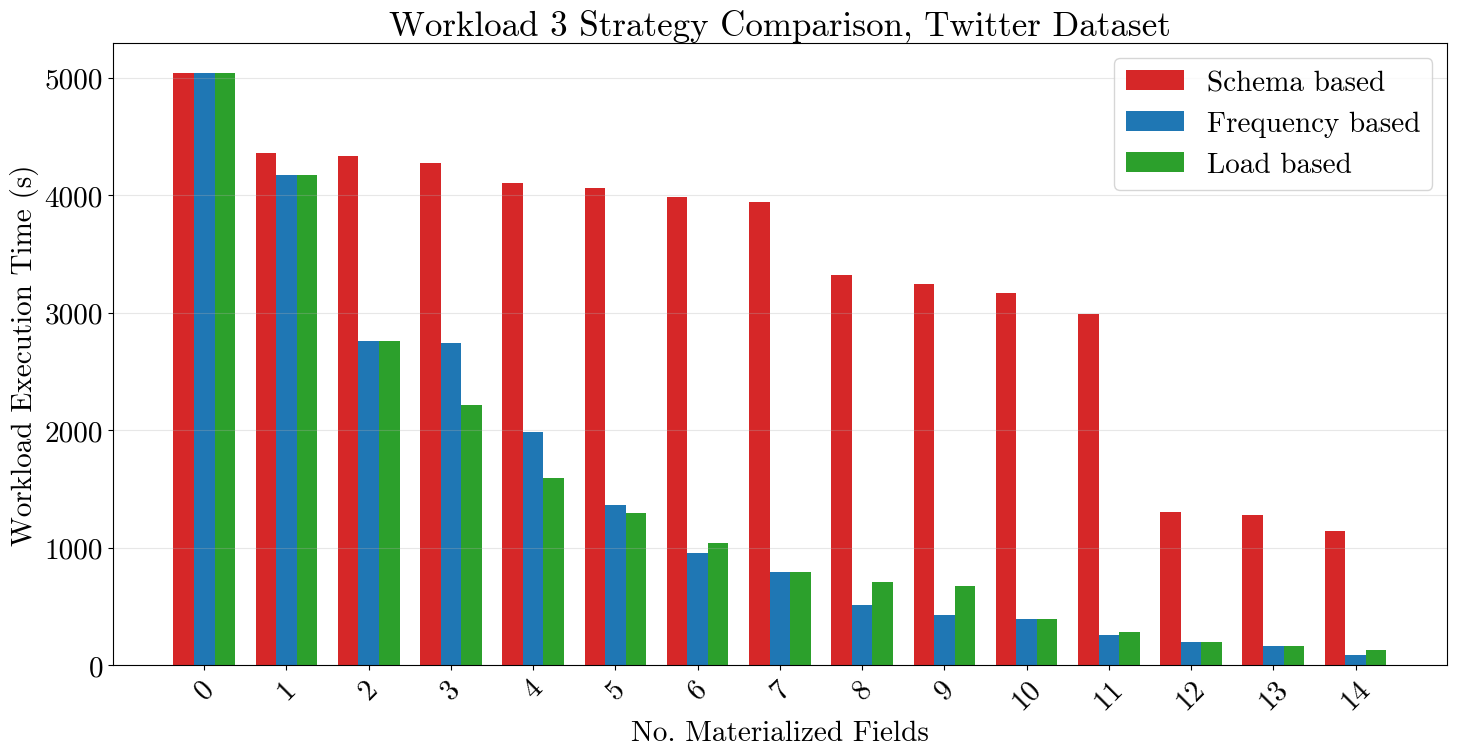

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


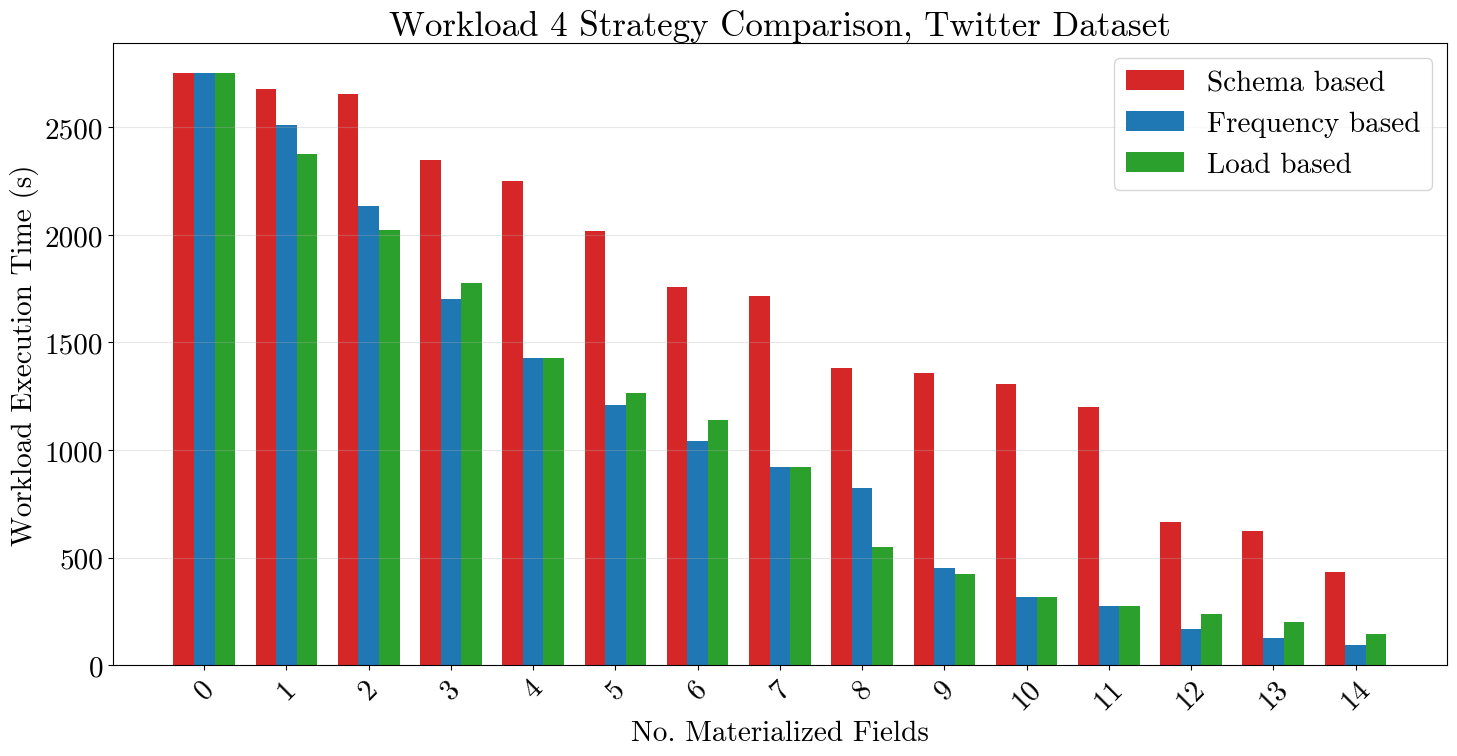

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


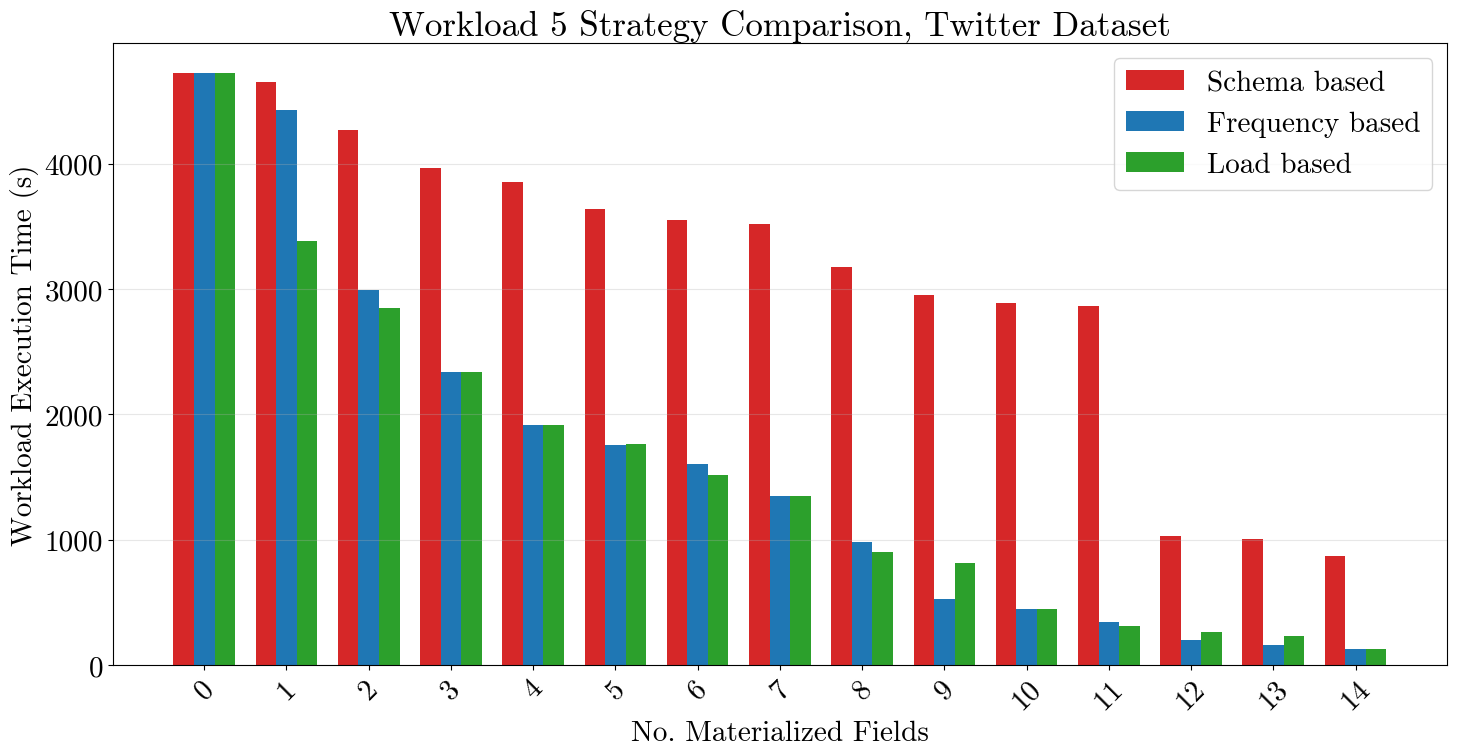

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


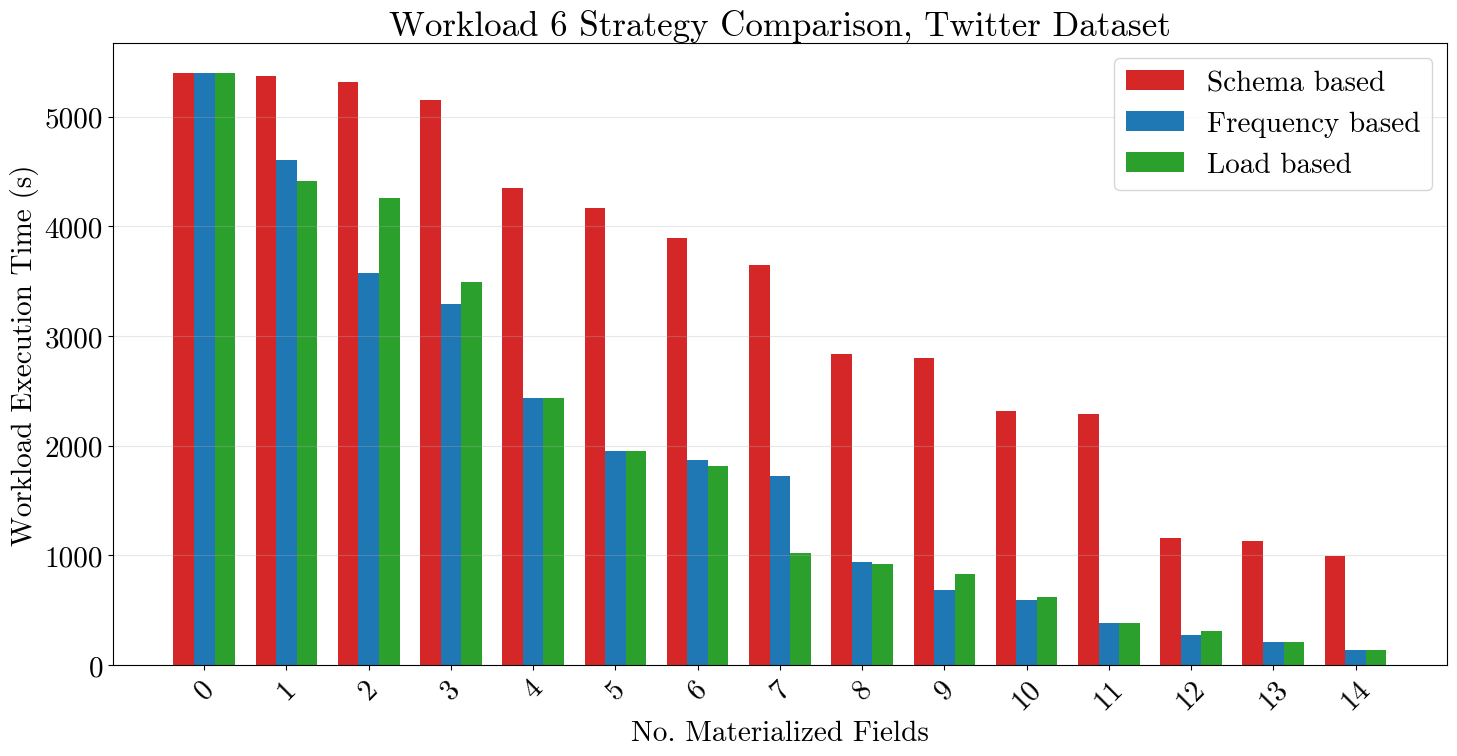

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


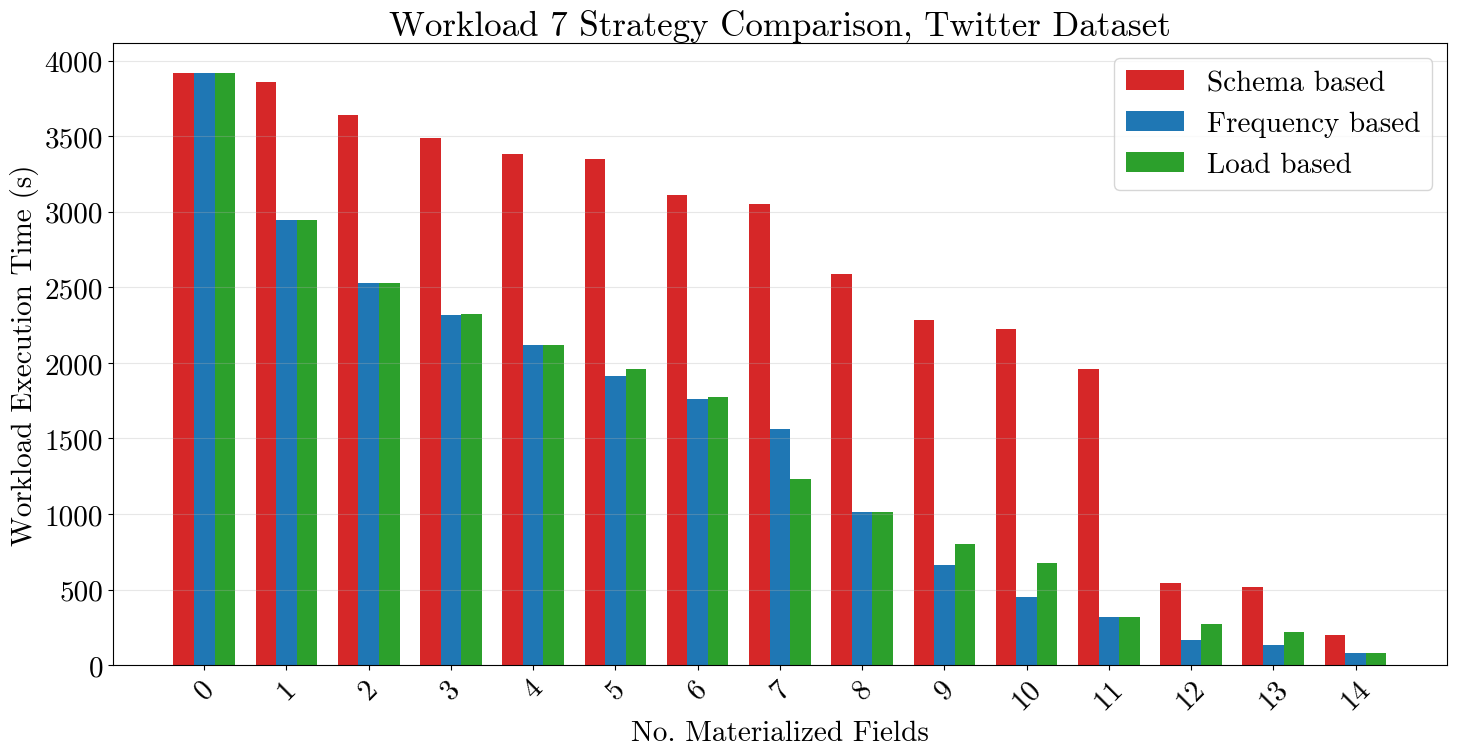

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


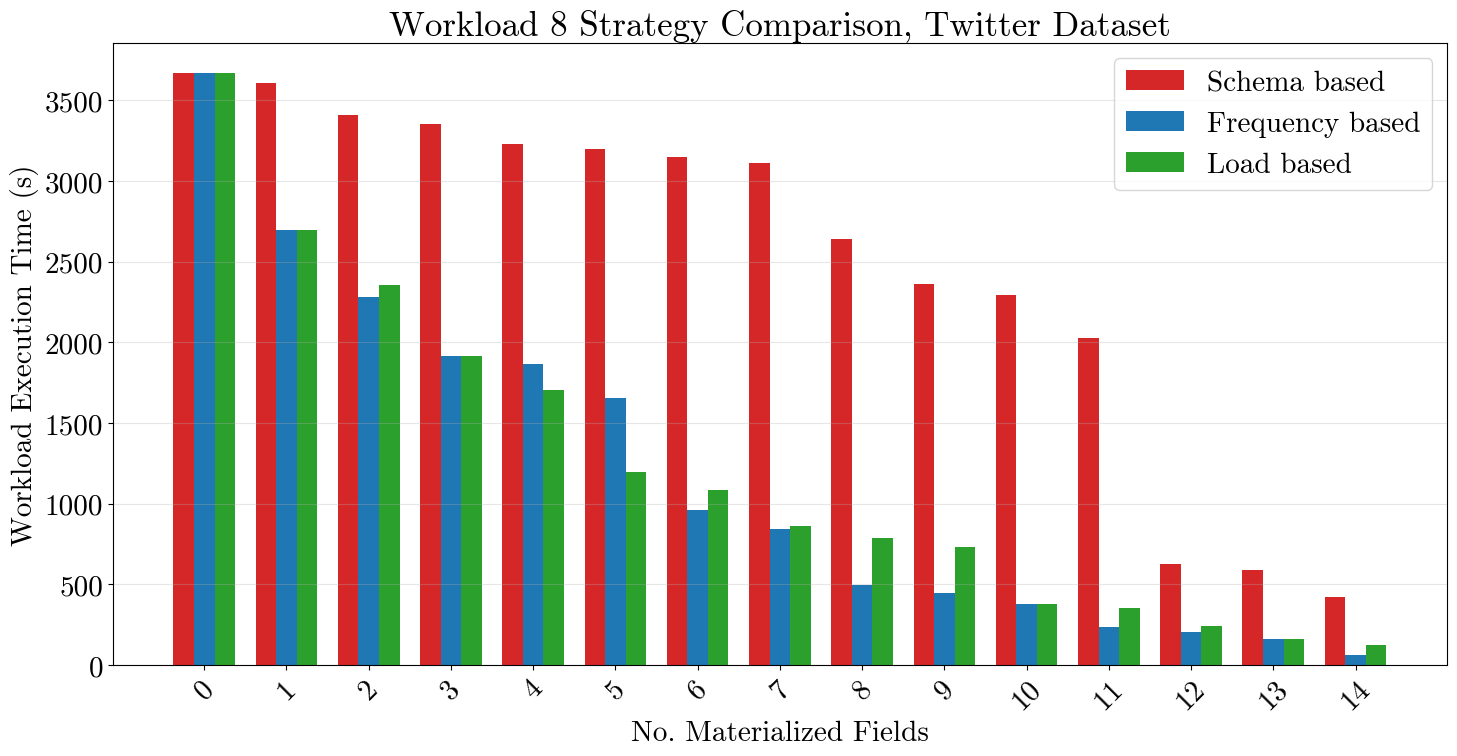

/tmp/ipykernel_1187797/779163756.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


Load_frequency
Test_frequency
Total Query Time_frequency
Majority Queries_frequency
Materialization_frequency
Strategy_frequency
test_num
Load_schema
Test_schema
Total Query Time_schema
Majority Queries_schema
Materialization_schema
Strategy_schema
Load
Test
Total Query Time_load
Majority Queries
Materialization
Strategy


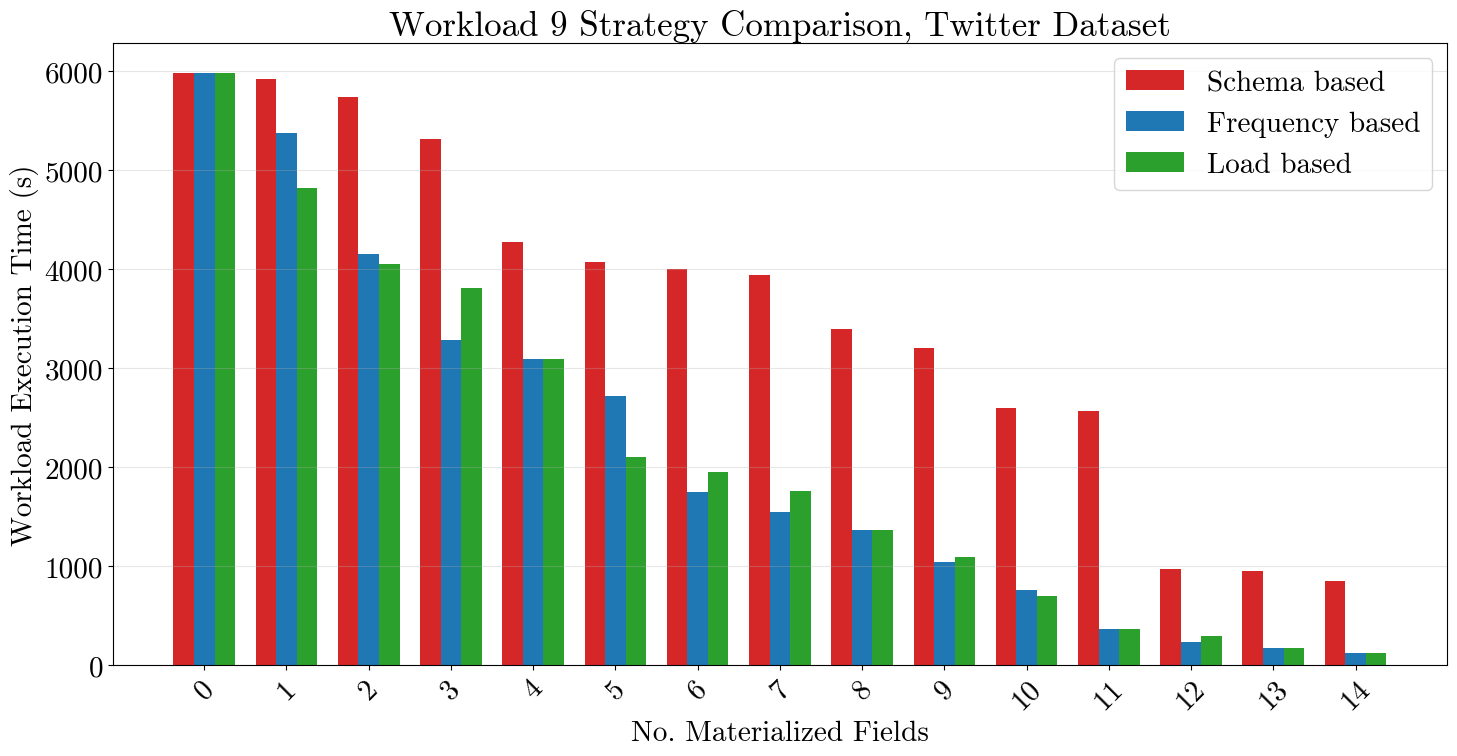

In [26]:
results_frequency_df = load_results_df(RESULTS_PATH, strategy='frequency')
results_frequency_df = prepare_df_for_plot(results_frequency_df, strategy='frequency')


results_schema_df = load_results_df(RESULTS_PATH, strategy='schema')
results_schema_df = prepare_df_for_plot(results_schema_df, strategy='schema')


results_load_df = load_results_df(RESULTS_PATH, strategy='load')
results_load_df = prepare_df_for_plot(results_load_df, strategy='load')

for i in range(10):
    plot_grouped_comparison_individual_load(
        results_frequency_df, results_schema_df, results_load_df, i)
    # plot_line_comparison_individual(results_frequency_df, results_schema_df, results_load_df, i)

wl 2, maj=['q1', 'q2', 'q12', 'q14']
- 7-8
  - load materialiserer user_followersCount
  - freq materialiserer user_isTranslator
- 8-9
  - load materialiserer text
  - freq materialiserer user_followersCount
- 9-10
  - load materialiserer delete_timestampMs
  - freq materialiserer text

Veldig dumt at user_isTranslator ikke materialiseres, siden det er veldig selektivt.


/tmp/ipykernel_1187797/786593639.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


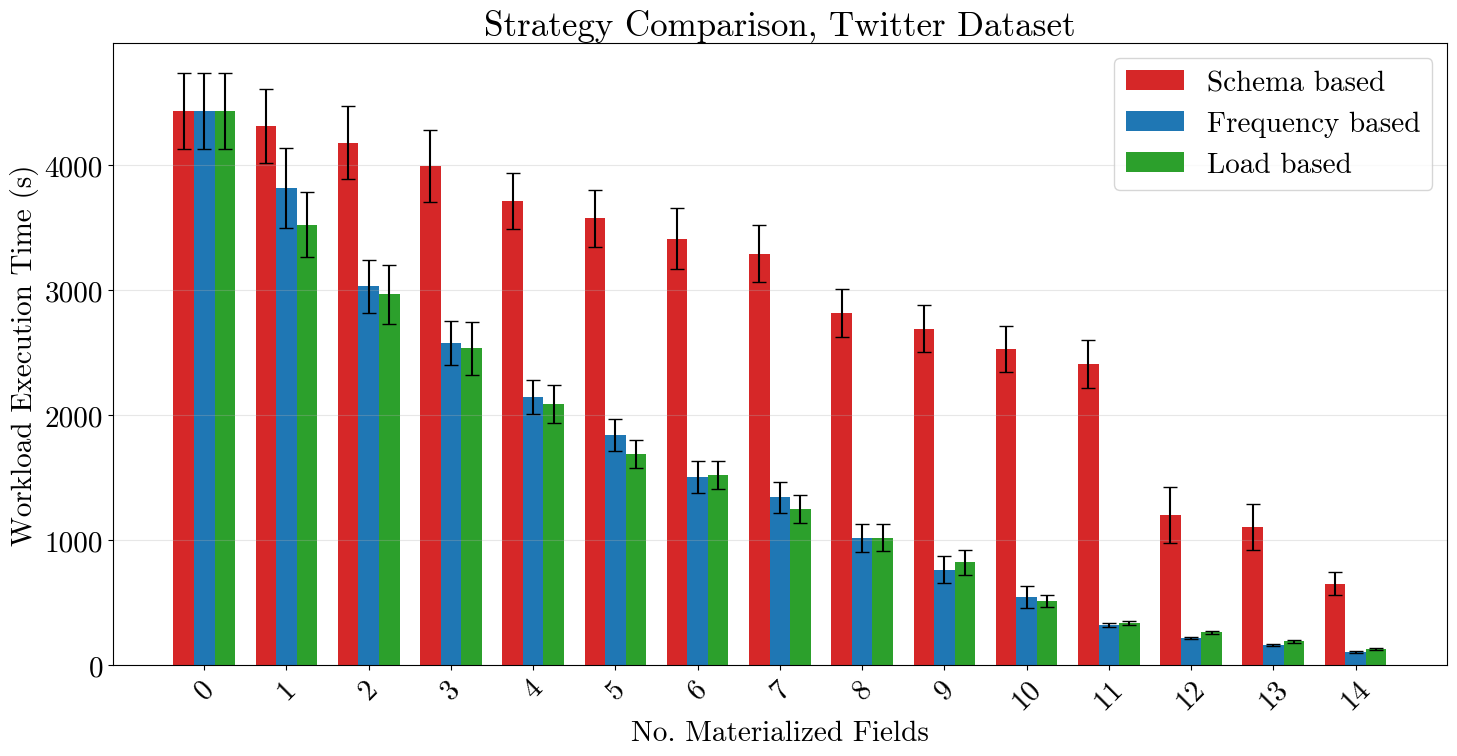

/tmp/ipykernel_1187797/786593639.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 8))


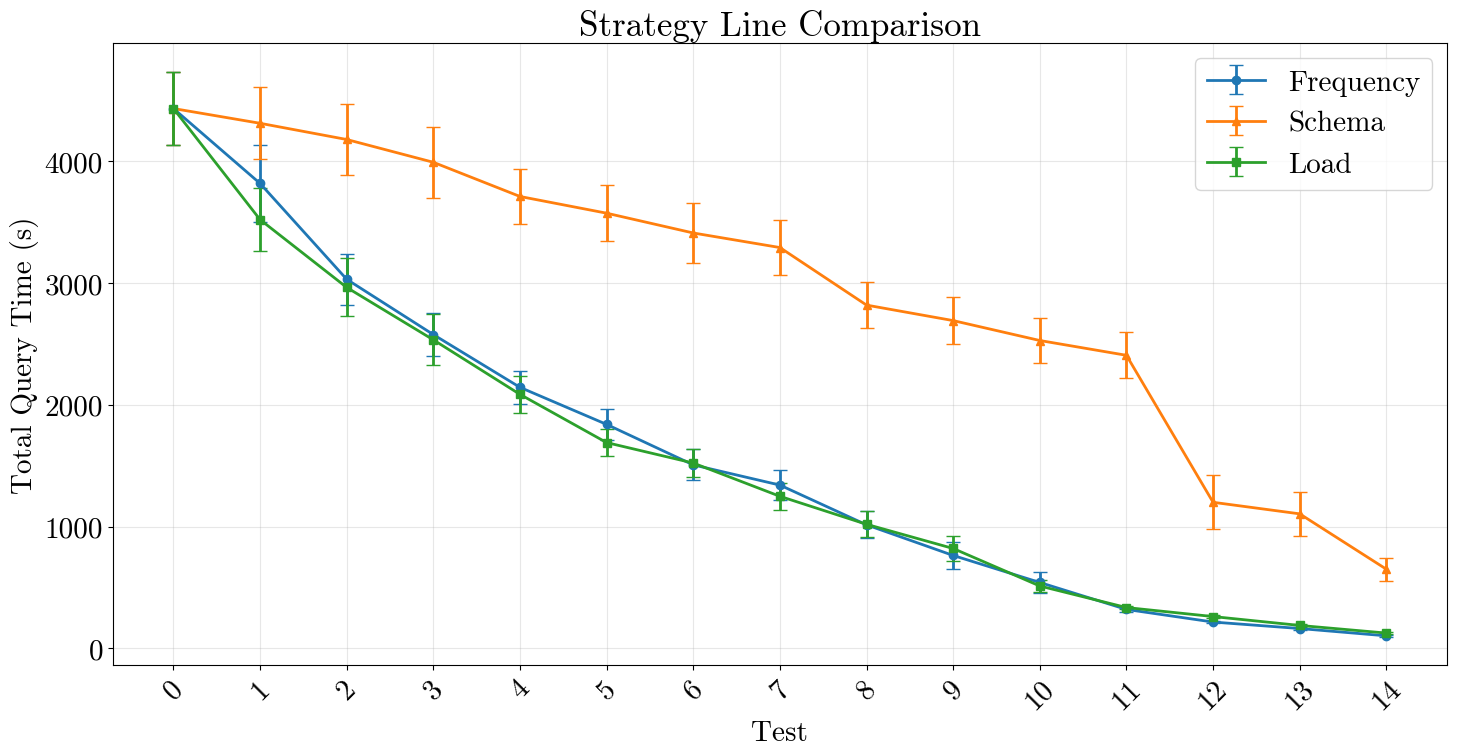

/tmp/ipykernel_1187797/786593639.py:137: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))


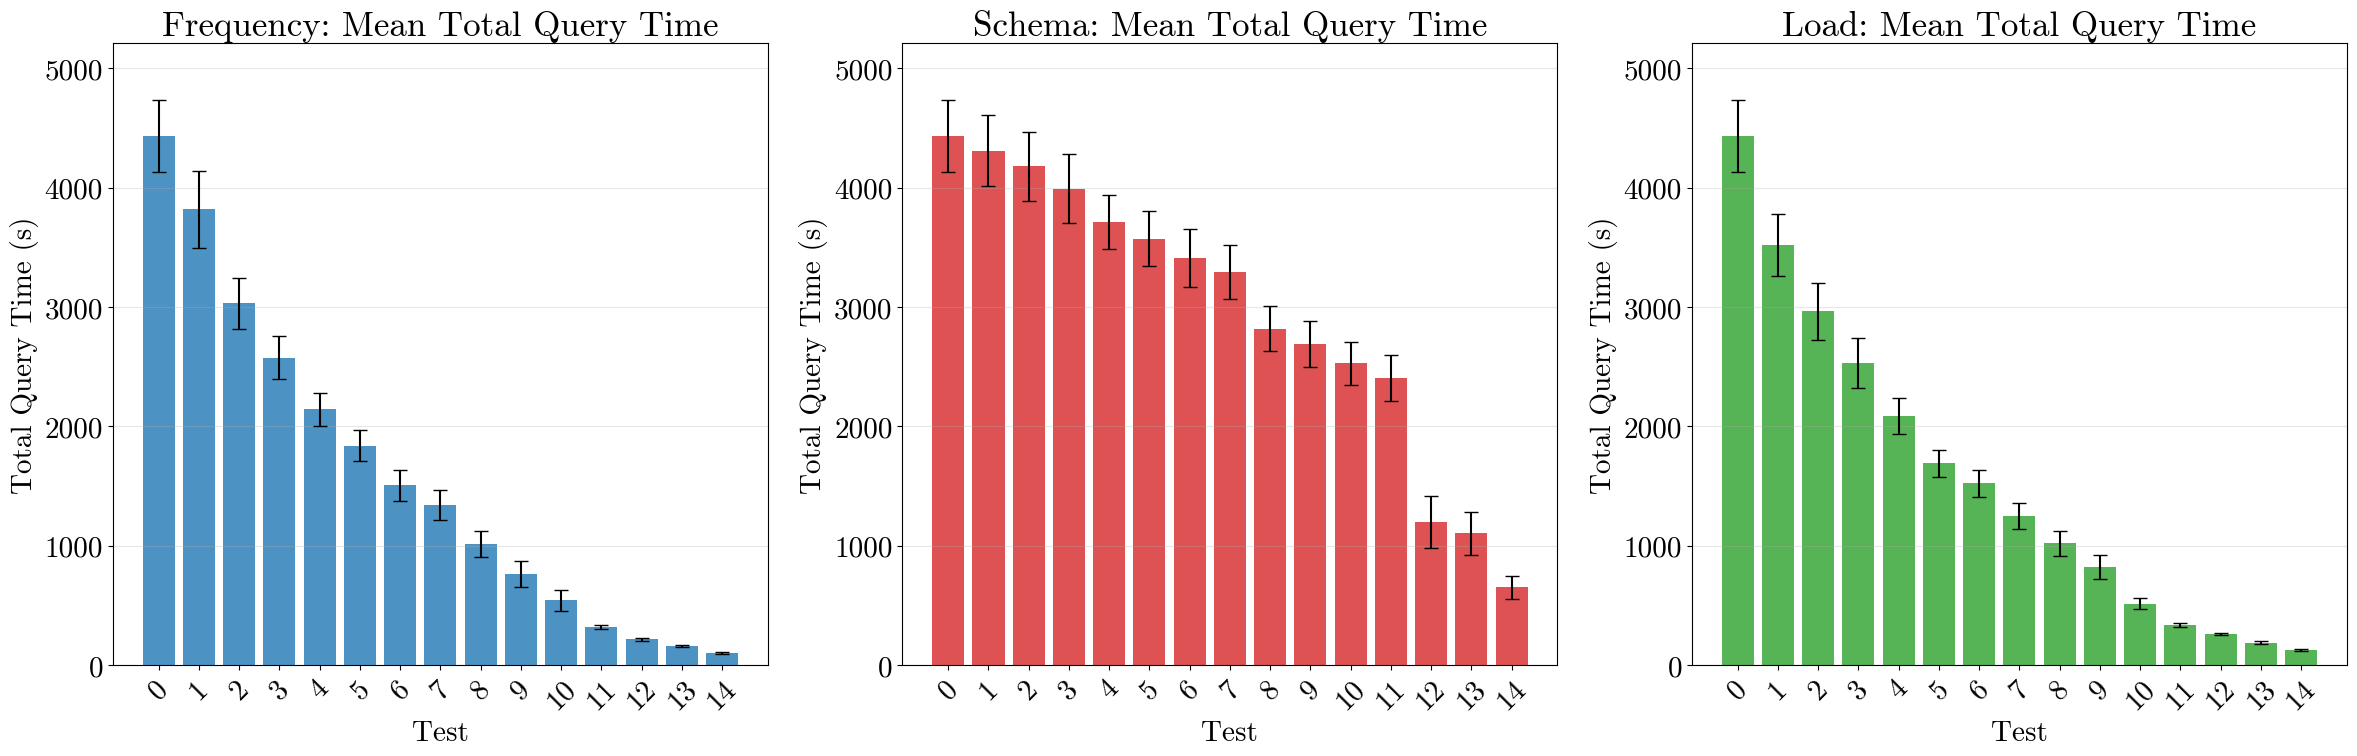

/tmp/ipykernel_1187797/786593639.py:207: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))


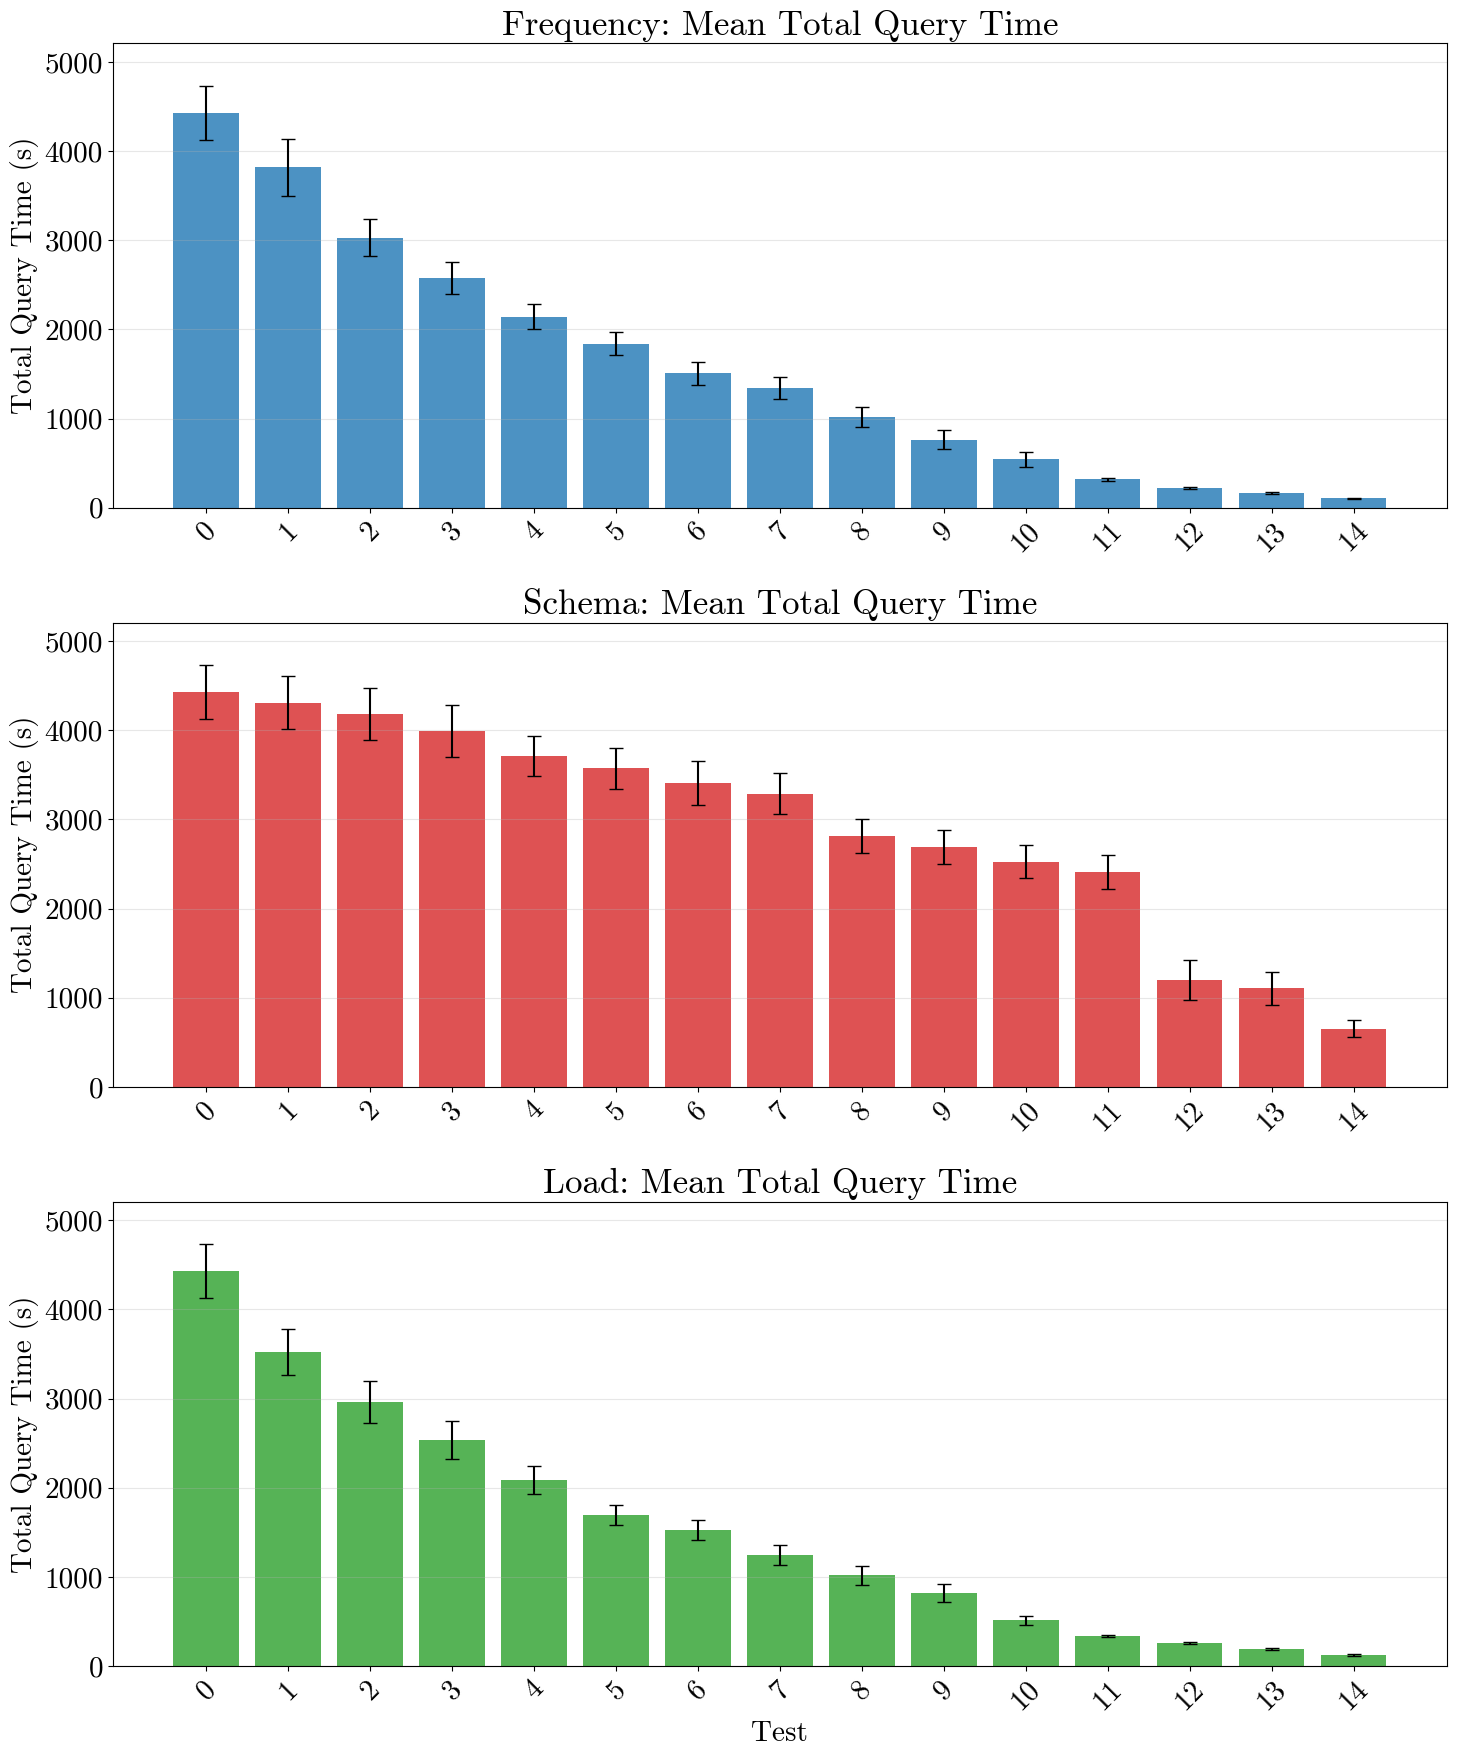

In [27]:
# Phase Comparison Section
## Load and prepare data for both phases
results_frequency_df = load_results_df(RESULTS_PATH, strategy='frequency')
frequency_mean_df = create_mean_df(results_frequency_df)
frequency_mean_df = prepare_df_for_plot(frequency_mean_df, strategy='frequency')

results_schema_df = load_results_df(RESULTS_PATH, strategy='schema')
schema_mean_df = create_mean_df(results_schema_df)
schema_mean_df = prepare_df_for_plot(schema_mean_df, strategy='schema')

results_load_df = load_results_df(RESULTS_PATH, strategy='load')
load_mean_df = create_mean_df(results_load_df)
load_mean_df = prepare_df_for_plot(load_mean_df, strategy='load')


# Create all comparison plots
plot_grouped_comparison(frequency_mean_df, schema_mean_df, load_mean_df)
plot_line_comparison(frequency_mean_df, schema_mean_df, load_mean_df)
plot_side_by_side_comparison(frequency_mean_df, schema_mean_df, load_mean_df)
plot_vertical_comparison(frequency_mean_df, schema_mean_df, load_mean_df)